# *Simplex.py*

En el siguiente tutorial, se van a ver todos los métodos con los que cuenta la librería Simplex.py. Por supuesto, una aplicación de muchos de ellos, siguiendo una secuencia, correcta, podría dar lugar a la resolución de un problema de programación lineal. Sin embargo, obtener una solcuión desde esta perspectiva, es algo mucho más largo y complejo, siendo mucho más fácil usar el programa SimplexSolver.py.

Para el uso de la librería, se ha creado una clase auxiliar llamada rational. Esta clase representa a los números racionales. Cada objeto de esa clase contará con un númerador y un denominador, de tal forma que si se quiere definir un número entero, habrá que asignarle denominador 1. La forma de definir un objeto rational es la siguiente:

*** rational(3,2) *** # Esto define el número 3/2

El tutorial se va a dividir en cuatro partes, las mismas en las que se divide la librería. La primera, muestra los métodos creados para realizar operaciones con racionales(muchos de ellos se utilizan simplemente para las comprobaciones de parámetros de entrada de otros métodos). La segunda parte, serán operaciones con matrices y arrays(tales como invertir una matriz), que han tenido que ser redefinidas para que puedan ser utilizadas con la clase rational. La tercera parte, son los métodos utilizados para alcanzar la solución mediante el método Simplex, y la cuarta, será la formada por aquellos métodos que permiten obtener la solución gráfica. 

A continuación se exponen los métodos de la librería, con explicaciones y ejemplos de cada uno de ellos.

**NOTA 1:** Siempre que se hable de variables del problema, hay que considerar, que la primera variable será la 0, es decir x0.     
**NOTA 2:** Los "imports" necesarios se realizan en la primera celda, para ejecutar cualquiera de las siguientes, sin errores, debe ejecutar primero la celda que contiene los "imports". Si realiza una ejecución en su propio entorno de programación, debe importar estas dos clases, para que los métodos se ejecuten sin errores(por favor, consulte en detalle el manual de instalación que hay en la misma localización que este manual):

*** from PySimplex import Simplex  
from PySimplex import rational   
import numpy as np***

## Operaciones con rational

### *convertStringToRational*

Este método recibe un número en un string, y devuelve el número como un rational. Si no recibe un string, devuelve None. Ejemplos:

In [1]:
from PySimplex import Simplex
from PySimplex import rational
import numpy as np

number="2"
print(Simplex.convertStringToRational(number))

2


In [2]:
number="2/5"
print(Simplex.convertStringToRational(number))

2/5


In [3]:
# Si recibe algo que no es un string, devuelve None
number=2
print(Simplex.convertStringToRational(number))

None


------

### *convertLineToRationalArray*

Este método recibe un string, que contiene un conjunto de números separados por un espacio, y devuelve los números en un array de numpy con elementos rational.Si no recibe un string, devuelve None. Ejemplos:

In [4]:
line="3 4 5"
print(Simplex.printMatrix((np.asmatrix(Simplex.convertLineToRationalArray(line)))))

[3 , 4 , 5]


In [5]:
line="3 4/5 5"
print(Simplex.printMatrix((np.asmatrix(Simplex.convertLineToRationalArray(line)))))

[3 , 4/5 , 5]


In [6]:
# Si se le pasa algo que no es un string, devuelve None
print(Simplex.convertLineToRationalArray(4))

None


------

### *rationalToFloat* 

Este método recibe un objeto rational, y devuelve su valor en float. Lo que hace es realizar la división entre el númerador y el denominador. En caso de no pasar un rational como parámetro, devuelve None.

In [7]:
a=rational(3,4)
Simplex.rationalToFloat(a)

0.75

In [8]:
a=rational(3,1)
Simplex.rationalToFloat(a)

3.0

In [9]:
# Si no se introduce un rational, devuelve None
a=3.0
print(Simplex.rationalToFloat(a))

None


------

### * listPointsRationalToFloat*

Este método recibe una lista de puntos, cuyas coordenadas son rational, y devuelve la misma lista de puntos, pero con las coordenadas en float. En caso de no introducir una lista de rational, devuelve None. Ejemplos:

In [10]:
rationalList=[(rational(4,5),rational(1,2)),(rational(4,2),rational(3,1)),(rational(8,3),rational(3,5)),(rational(7,2)
            ,rational(4,5)),(rational(7,9),rational(4,9)),(rational(9,8),rational(10,7))]
Simplex.listPointsRationalToFloat(rationalList)

[(0.8, 0.5),
 (2.0, 3.0),
 (2.6666666666666665, 0.6),
 (3.5, 0.8),
 (0.7777777777777778, 0.4444444444444444),
 (1.125, 1.4285714285714286)]

In [11]:
# Si recibe algo que no es una lista de puntos con coordenadas rational,devuelve None
rationalList=[(4.0,5.0),(4.0,3.0),(8.0,5.0),(7.0,4.0),(7.0,9.0),(10.0,4.0)]
print(Simplex.listPointsRationalToFloat(rationalList))

None


------

### *isAListOfRationalPoints*

Este método recibe una lista, y devuelve True, si todos los elementos son puntos(tuplas)con coordenadas rational o False, si hay algún elemento que no es un punto cuyas coordenadas sean rational. En caso de no pasar una lista, devuelve None. Ejemplos:

In [12]:
lis=[(rational(1,2),rational(5,7)),(rational(4,5),rational(4,6)),(rational(4,9),rational(9,8))]
Simplex.isAListOfRationalPoints(lis)

True

In [13]:
lis=[(rational(1,2),rational(5,7)),(4,rational(4,6)),(rational(4,9),rational(9,8))]
Simplex.isAListOfRationalPoints(lis)

False

In [14]:
# Si recibe algo que no es una lista devuelve None
lis=np.array([(rational(1,2),rational(5,7)),(4,rational(4,6)),(rational(4,9),rational(9,8))])
print(Simplex.isAListOfRationalPoints(lis))

None


------

### *isAListOfPoints*

Este método recibe una lista, y devuelve True, si todos los elementos son puntos(tuplas) o False, si hay algún elemento que no es un punto. En caso de no pasar una lista, devuelve None. Ejemplos:

In [15]:
# Si todos los elementos son puntos(tuplas), devuelve True
lis=[(3,4),(5,6),(7,8),(8,10)]
Simplex.isAListOfPoints(lis)

True

In [16]:
# Si recibe una lista cuyos elementos, no son todos puntos(tuplas), devuelve False
lis=[3,5,6,(6,7)]
Simplex.isAListOfPoints(lis)

False

In [17]:
# Si recibe algo que no es una lista devuelve None
print(Simplex.isAListOfPoints(3))

None


------

### *isARationalMatrix*

Este método recibe una matriz de numpy o un array bidimensional de numpy, y comprueba si todos los elementos del mismo, son rational, en ese caso devuelve True. En otro caso devuelve False. Si no recibe una matriz o un array de numpy, devuelve None. Ejemplos:

In [18]:
mat=np.matrix([[rational(1,2),rational(5,7)],[rational(5,8),rational(9,3)]])
Simplex.isARationalMatrix(mat)

True

In [19]:
mat=np.array([[rational(1,2),rational(5,7)],[rational(5,8),rational(9,3)]])
Simplex.isARationalMatrix(mat)

True

In [20]:
mat=np.matrix([[1,rational(5,7)],[rational(5,8),rational(9,3)]])
Simplex.isARationalMatrix(mat)

False

In [21]:
# Si recibe algo que no es una matriz o un array de numpy
mat=[rational(1,2),rational(5,7)]
print(Simplex.isARationalMatrix(mat))

None


------

### *isARationalArray*

Este método recibe un array de numpy, y comprueba si todos los elementos del mismo, son rational, en ese caso devuelve True. En otro caso devuelve False. Si no recibe una matriz o un array de numpy, devuelve None. Ejemplos:

In [22]:
arr=np.array([rational(1,2),rational(5,7),rational(4,5)])
Simplex.isARationalArray(arr)

True

In [23]:
arr=np.array([rational(1,2),6,rational(4,5)])
Simplex.isARationalArray(arr)

False

In [24]:
# Si recibe algo que no es una matriz o un array de numpy
arr=[rational(1,2),rational(5,7),rational(4,5)]
print(Simplex.isARationalArray(arr))

None


------

## Operaciones con matrices 

### *determinant*

Este método recibe una matriz de numpy, con componentes rational, y devuelve el determinante de la matriz. La matriz debe ser cuadrada. Si se introduce algo que no es una matriz cuadrada de numpy, con elementos rational, devuelve None. También admite un array de numpy bidimensional.Ejemplos:

In [25]:
matrix=np.matrix([[rational(4,7),rational(8,9)],[rational(2,4),rational(3,4)]])
det=Simplex.determinant(matrix)
print(det)

-1/63


In [26]:
# Si la matriz no es cuadrada, devuelve None
matrix=np.matrix([[rational(4,7),rational(8,9)],[rational(2,4),rational(3,4)],[rational(5,4),rational(3,9)]])
print(Simplex.determinant(matrix))

None


In [27]:
# También admite un array de numpy bidimensional
matrix=np.array([[rational(4,7),rational(8,9)],[rational(2,4),rational(3,4)]])
print(Simplex.determinant(matrix))

-1/63


In [28]:
# Si recibe algo que no es una matriz cuadrada de numpy, con elementos rational, devuelve None
print(Simplex.determinant(3))

None


------

### *coFactorMatrix*

Este método recibe una matriz de numpy, con componentes rational, y devuelve la matriz de cofactores. La matriz debe ser cuadrada. Si se introduce algo que no es una matriz cuadrada de numpy, con elementos rational, devuelve None. Ejemplos:

In [29]:
matrix=np.matrix([[rational(4,7),rational(8,9)],[rational(2,4),rational(3,4)]])
m=Simplex.coFactorMatrix(matrix)
print(Simplex.printMatrix(m))

[3/4 , -1/2
-8/9 , 4/7]


In [30]:
# Si la matriz no es cuadrada, devuelve None
matrix=np.matrix([[rational(4,7),rational(8,9)],[rational(2,4),rational(3,4)],[rational(5,4),rational(3,9)]])
print(Simplex.coFactorMatrix(matrix))

None


In [31]:
# Si recibe algo que no es una matriz cuadrada de numpy, con elementos rational, devuelve None
matrix=np.array([[rational(4,7),rational(8,9)],[rational(2,4),rational(3,4)]])
print(Simplex.coFactorMatrix(matrix))

None


------

### *adjMatrix*

Este método recibe una matriz de numpy, con componentes rational, y devuelve la matriz de adjuntos. La matriz debe ser cuadrada. Si se introduce algo que no es una matriz cuadrada de numpy, con elementos rational, devuelve None. Ejemplos:

In [32]:
matrix=np.matrix([[rational(4,7),rational(8,9)],[rational(2,4),rational(3,4)]])
m=Simplex.adjMatrix(matrix)
print(Simplex.printMatrix(m))

[3/4 , -8/9
-1/2 , 4/7]


In [33]:
# Si la matriz no es cuadrada, devuelve None
matrix=np.matrix([[rational(4,7),rational(8,9)],[rational(2,4),rational(3,4)],[rational(5,4),rational(3,9)]])
print(Simplex.adjMatrix(matrix))

None


In [34]:
# Si recibe algo que no es una matriz cuadrada de numpy, con elementos rational, devuelve None
matrix=np.array([[rational(4,7),rational(8,9)],[rational(2,4),rational(3,4)]])
print(Simplex.invertMatrix(matrix))

None


------

### *invertMatrix*

Este método recibe una matriz de numpy, con componentes rational, y devuelve la matriz inversa. La matriz debe ser cuadrada. Si se introduce algo que no es una matriz cuadrada de numpy, con elementos rational, devuelve None. Ejemplos:

In [35]:
matrix=np.matrix([[rational(4,7),rational(8,9)],[rational(2,4),rational(3,4)]])
m=Simplex.invertMatrix(matrix)
print(Simplex.printMatrix(m))

[189/-4 , 56
63/2 , 36/-1]


In [36]:
# Si la matriz no es cuadrada, devuelve None
matrix=np.matrix([[rational(4,7),rational(8,9)],[rational(2,4),rational(3,4)],[rational(5,4),rational(3,9)]])
print(Simplex.invertMatrix(matrix))

None


In [37]:
# Si recibe algo que no es una matriz cuadrada de numpy, con elementos rational, devuelve None
matrix=np.array([[rational(4,7),rational(8,9)],[rational(2,4),rational(3,4)]])
print(Simplex.invertMatrix(matrix))

None


------

### *initializeMatrix*

Este método recibe unas dimensiones y devuelve una matriz de numpy, con elementos rational,de valor 0. Si los valores introducidos no son enteros, devuelve None. Ejemplos: 

In [38]:
m=Simplex.initializeMatrix(3, 2)
print(Simplex.printMatrix(m))

[0 , 0
0 , 0
0 , 0]


In [39]:
# Si se introduce algo que no son enteros, devuelve None
print(Simplex.initializeMatrix(4.0,3.0))

None


------

### *createRationalIdentityMatrix*

Este método recibe un número y devuelve una matriz identidad de numpy, con elementos rational. Si el valor introducido no es entero, devuelve None. Ejemplos: 

In [40]:
m=Simplex.createRationalIdentityMatrix(3)
print(Simplex.printMatrix(m))

[1 , 0 , 0
0 , 1 , 0
0 , 0 , 1]


In [41]:
# Si se introduce algo que es un entero, devuelve None
print(Simplex.createRationalIdentityMatrix(4.0))

None


------

### *multNumMatrix*

Este método recibe un número en forma rational y una matriz de numpy, con componentes rational, y devuelve la matriz del producto del número por  la matriz introducida.Si se introduce algo que no es un rational como número o una matriz de numpy, con elementos rational,como matriz, devuelve None. Ejemplos:

In [42]:
matrix=np.matrix([[rational(4,7),rational(8,9)],[rational(2,4),rational(3,4)],[rational(4,6),rational(9,1)]])
num= rational(3,4)
m = Simplex.multNumMatrix(num, matrix)
print(Simplex.printMatrix(m))

[3/7 , 2/3
3/8 , 9/16
1/2 , 27/4]


In [43]:
# Si recibe algo que no es una matriz de numpy, con elementos rational, devuelve None
num = 4
print(Simplex.multNumMatrix(num, matrix))

None


------

### *twoMatrixEqual*

Este método recibe dos matrices de numpy, con componentes rational, y devuelve True,si son iguales, o False, si no lo son. Si se introduce algo que no es una matriz de numpy, con elementos rational, devuelve None. Ejemplos:

In [44]:
matrix1=np.matrix([[rational(4,7),rational(8,9)],[rational(2,4),rational(3,4)],[rational(4,6),rational(9,1)]])
matrix2=np.matrix([[rational(4,7),rational(8,9)],[rational(2,4),rational(3,4)],[rational(4,6),rational(9,1)]])
Simplex.twoMatrixEqual(matrix1, matrix2)

True

In [45]:
matrix1=np.matrix([[rational(4,7),rational(8,9)],[rational(2,4),rational(3,4)],[rational(4,6),rational(9,1)]])
matrix2=np.matrix([[rational(4,7),rational(8,9)],[rational(2,4),rational(3,4)],[rational(9,6),rational(6,1)]])
Simplex.twoMatrixEqual(matrix1, matrix2)

False

In [46]:
# Si las dimensiones no son iguales, devuelve False
matrix1=np.matrix([[rational(4,7),rational(8,9)],[rational(2,4),rational(3,4)],[rational(4,6),rational(9,1)]])
matrix2=np.matrix([[rational(4,7),rational(8,9)],[rational(2,4),rational(3,4)]])
Simplex.twoMatrixEqual(matrix1, matrix2)

False

In [47]:
# Si recibe algo que no es una matriz de numpy, con elementos rational, devuelve None
print(Simplex.twoMatrixEqual(matrix1, 3))

None


------

### *printMatrix*

Este método recibe una matriz de numpy, con componentes rational, y la pasa a formato string.Si se introduce algo que no es una matriz de numpy, con elementos rational, devuelve None. También admite un array de numpy bidimensional. Ejemplos:

In [48]:
matrix2=np.matrix([[rational(4,7),rational(8,9)],[rational(2,4),rational(3,4)],[rational(9,6),rational(6,1)]])
print(Simplex.printMatrix(matrix2))

[4/7 , 8/9
2/4 , 3/4
9/6 , 6]


In [49]:
# También admite un array de numpy bidimensional
matrix2=np.array([[rational(4,7),rational(8,9)],[rational(2,4),rational(3,4)],[rational(9,6),rational(6,1)]])
print(Simplex.printMatrix(matrix2))

[4/7 , 8/9
2/4 , 3/4
9/6 , 6]


In [50]:
# Si recibe algo que no es una matriz de numpy o un array bidimensional, con elementos rational, devuelve None
print(Simplex.printMatrix(matrix2))

[4/7 , 8/9
2/4 , 3/4
9/6 , 6]


------

### *multMatrix*

Este método recibe dos matrices de numpy, con componentes rational, y devuelve la matriz resultado del producto de las dos matrices introducidas. Si el número de columnas de la primera matriz, y el número de filas de la segunda, no son iguales, las matrices no se pueden multiplicar y devuelve None. Si se introduce algo que no es una matriz de numpy, con elementos rational, devuelve None. Ejemplos:

In [51]:
matrix1=np.matrix([[rational(4,7),rational(8,9),rational(2,5)],[rational(2,4),rational(3,4),rational(7,5)]])
matrix2=np.matrix([[rational(4,7),rational(8,9)],[rational(2,4),rational(3,4)],[rational(4,6),rational(9,1)]])
m=Simplex.multMatrix(matrix1, matrix2)
print(Simplex.printMatrix(m))

[2288/2205 , 1504/315
1339/840 , 9797/720]


In [52]:
# Si el número de columnas de la primera matriz, y el número de filas de la segunda, no son iguales, devuelve None
matrix1=np.matrix([[rational(4,7),rational(8,9)],[rational(2,4),rational(3,4)]])
matrix2=np.matrix([[rational(4,7),rational(8,9)],[rational(2,4),rational(3,4)],[rational(4,6),rational(9,1)]])
print(Simplex.multMatrix(matrix1, matrix2))

None


In [53]:
# Si recibe algo que no es una matriz de numpy, con elementos rational, devuelve None
matrix1=np.array([[rational(4,7),rational(8,9)],[rational(2,4),rational(3,4)]])
matrix2=np.array([[rational(4,7),rational(8,9)],[rational(2,4),rational(3,4)],[rational(4,6),rational(9,1)]])
print(Simplex.multMatrix(matrix1, matrix2))

None


------

## Método Simplex

### *variablesNoiteration*

Este método se utiliza para calcular las variables que no están en la iteración. Recibe como parámetro, una matrix numpy, que contiene las restricciones del problema y un array numpy, que contiene las variables que ya están en la iteración(estas variables no tienen porqué aparecer ordenadas en el array). El método funciona, con matrices de tipo entero, de tipo float y de tipo rational. En caso de que los parámetros introducidos no sean correctos, devolverá None. Si todo es correcto, devolverá array numpy, con las variables que no están en la iteración. Ejemplos:

In [54]:
matrix=np.matrix([[1,3,4,4,5],[12,45,67,78,9],[3,4,3,5,6]])
variablesIteration=np.array([1,3,4])
Simplex.variablesNoiteration(matrix,variablesIteration)

array([ 0.,  2.])

In [55]:
variablesIteration=np.array([3,4,1])
Simplex.variablesNoiteration(matrix,variablesIteration)

array([ 0.,  2.])

In [56]:
# EL método funciona con matrices con elementos rational
matrix=np.matrix([[rational(6,7),rational(4,5),rational(3,1)],[rational(2,3),rational(7,6),rational(1,3)],
                  [rational(4,1),rational(6,4),rational(9,2)]])
variablesIteration=np.array([3,4,1])
Simplex.variablesNoiteration(matrix,variablesIteration)

array([ 0.,  2.])

In [57]:
#Si le introduzco algo que no sea una matriz de numpy en el primer parámetro o algo que no sea un array de numpy en el segundo,me
#devuelve None
print(Simplex.variablesNoiteration(3,variablesIteration))

None


------

### *calcMinNoNan*

Este método se utiliza para calcular cuál es el mínimo valor, de un conjunto de valores. Recibe un array de numpy, con los valores. El método selecciona aquellos valores que sean rational, y calcula el mínimo. En caso de que los parámetros introducidos no sean correctos, devolverá None. Si todo es correcto, devolverá el mínimo valor no negativo o None, en caso de que no haya valores rational. Ejemplos:

In [58]:
setOfVal=np.array([rational(1,4),rational(4,7),rational(6,8),rational(6,4)])
print(Simplex.calcMinNoNan(setOfVal))

1/4


In [59]:
setOfVal=np.array([np.nan,rational(4,7),rational(6,8),rational(6,4)])
print(Simplex.calcMinNoNan(setOfVal))

4/7


In [60]:
#Si le paso un conjunto de valores, TODOS no rational, devuelve None
setOfVal=np.array([np.nan,np.nan,np.nan,np.nan])
print(Simplex.calcMinNoNan(setOfVal))

None


In [61]:
#Si le algo que no es array numpy, devuelve None
print(Simplex.calcMinNoNan(2))

None


------

### *calculateIndex*

Este método recibe un array de numpy, y un valor, y devuelve la posición dentro del array donde se encuentra la primera ocurrencia de dicho valor. En caso de que dicho valor no aparezca en el array, se devolverá None. El método funciona con conjuntos de números enteros y con conjuntos de rational. En caso de que los parámetros introducidos no sean correctos, devolverá None.Ejemplos:

In [62]:
array=np.array([3,4,5,6,7,2,3,6])
value= 3
Simplex.calculateIndex(array,value)

0

In [63]:
#Si introduzco un valor que no está en el array, devuelve None
value=78
print(Simplex.calculateIndex(array,value))

None


In [64]:
# El método funciona también con rational
value=rational(4,7)
array=np.array([rational(1,4),rational(4,7),rational(6,8),rational(6,4)])
Simplex.calculateIndex(array,value)

1

In [65]:
#Si introduzco algo que no es un array en el primer parámetro o algo que no es un número en el segundo, devuelve None
print(Simplex.calculateIndex(4,value))

None


------

### *calculateBaseIteration*

Este método calcula la base de la iteración, y la devuelve en una matriz numpy. Para ello, recibe la matriz que contiene todas las restricciones del problema(sin signo ni recursos), y las columnas que forman parte de la iteración(no tienen porqué aparecer ordenadas en el array). La matriz, puede ser de valores enteros o rational. En caso de que los parámetros introducidos no sean correctos, devolverá None. Ejemplos:

In [66]:
totalMatrix=np.matrix([[1,2,3,4,5],[2,6,7,8,9],[6,3,4,5,6]])
columnsOfIteration=np.array([1,2,0])
Simplex.calculateBaseIteration(totalMatrix,columnsOfIteration)

matrix([[2, 3, 1],
        [6, 7, 2],
        [3, 4, 6]])

In [67]:
# El método funciona también con matrices con elementos rational
columnsOfIteration=np.array([1,2,0])
totalMatrix=np.matrix([[rational(6,7),rational(4,5),rational(3,1),rational(5,3),rational(2,1)],[rational(2,3),rational(7,6),
                    rational(1,3),rational(2,5),rational(9,5)], [rational(4,1),rational(6,4),rational(9,2),rational(4,5),
                    rational(3,1)]])
print(Simplex.printMatrix(Simplex.calculateBaseIteration(totalMatrix,columnsOfIteration)))  


[4/5 , 3 , 6/7
7/6 , 1/3 , 2/3
6/4 , 9/2 , 4]


In [68]:
# Si le paso más columnas de las que hay en la matriz total, me devolverá None
columnsOfIteration=np.array([0,1,2,3,4,5,6])
print(Simplex.calculateBaseIteration(totalMatrix,columnsOfIteration))

None


In [69]:
# Si le introduzco algo que no sea una matriz de numpy en el primer parámetro o algo que no sea un array de numpy en el segundo
# ,me devuelve None
print(Simplex.calculateBaseIteration(4,columnsOfIteration))

None


------

### *showBase*

Este método recibe una matriz numpy con elementos rational, que se supone que será la base de una iteración, acompañado del nombre que se le quiera asignar, y la muestra por pantalla, con el nombre que se le asigna (B), dentro de la iteración. En caso de que los parámetros introducidos no sean correctos, devolverá None. Ejemplos:

In [70]:
base=np.matrix([[rational(6,7),rational(4,5),rational(3,1)],[rational(2,3),rational(7,6),rational(1,3)],
                  [rational(4,1),rational(6,4),rational(9,2)]])
Simplex.showBase(base,"B")

B = [6/7 , 4/5 , 3
2/3 , 7/6 , 1/3
4 , 6/4 , 9/2]



In [71]:
#Si se le pasa algo que no es una matriz de numpy con elementos rational en el primer parámetro, o un string en el segundo, me 
# devuelve None
print(Simplex.showBase(3,"B"))

None


------

### *calculateIterationSolution*

Este método calcula la solución de una iteración, para las variables de la misma, y la devuelve en un array de numpy. Para ello, recibe la base de la iteración, en una matriz numpy y también recibe el vector de recursos en un array de numpy. Los elementos de la matriz y el array, deben ser rational. En caso de que los parámetros introducidos no sean correctos, devolverá None. Ejemplos:

In [72]:
base=np.matrix([[rational(6,7),rational(4,5),rational(3,1)],[rational(2,3),rational(7,6),rational(1,3)],
                  [rational(4,1),rational(6,4),rational(9,2)]])

resourcesVector=np.array([rational(2,1),rational(33,2),rational(52,8)])
print(Simplex.printMatrix(np.asmatrix(Simplex.calculateIterationSolution(base,resourcesVector))))

[2409/70
91/4
62]


In [73]:
#Si le paso un vector de recursos, que tenga un longitud diferente al número de filas de la matriz, me duvuelve None
resourcesVector=np.array([rational(2,1),rational(33,2)])
print(Simplex.calculateIterationSolution(base,resourcesVector))

None


In [74]:
#Si le paso algo que no es una matriz de numpy  de elementos rational en el primer parámetro o un array de numpy con elementos 
# rational en el segundo, me devuelve None
print(Simplex.calculateIterationSolution(base,4))

None


------

### *showSolution*

Este método recibe la solución de una iteración, y la muestra con el nombre que se le asigna en ella ("x"). La solución deberá ser pasada en un numpy array en forma de columna con elementos rational. En caso de que los parámetros introducidos no sean correctos, devolverá None. Ejemplos:

In [75]:
sol=np.array([[rational(2,2)],[rational(5,3)],[rational(6,1)],[rational(7,8)]])
Simplex.showSolution(sol)

x = inv(B)*b = [2/2
5/3
6
7/8]



In [76]:
#Si le paso algo que no es un array numpy con elementos rational, me devuelve None
sol=np.array([[2],[5],[6],[7]])
print(Simplex.showSolution(sol))

None


------

### *calculateCB*

Este método calcula el valor del vector función, para una iteración. Para ello recibe en un array numpy, las columnas de la iteración, y en otro array numpy, el vector de función completo del problema. Si todo es correcto, se devuelve en un array numpy, el vector de la función para las columnas introducidas. En caso de que los parámetros introducidos no sean correctos, devolverá None. Ejemplos:

In [77]:
columnsOfIteration=np.array([0,2,3])
functionVector= np.array([0,1,2,3,5,5,6])
Simplex.calculateCB(columnsOfIteration,functionVector)

array([ 0.,  2.,  3.])

In [78]:
# El método también funciona con elementos rational
columnsOfIteration=np.array([0,2])
functionVector= np.array([rational(0,1),rational(2,3),rational(5,5)])
print(Simplex.printMatrix(np.asmatrix(Simplex.calculateCB(columnsOfIteration,functionVector))))

[0 , 5/5]


In [79]:
# Si meto más columnas de las que tiene el vector función, me devuelve None
columnsOfIteration=np.array([0,1,2])
functionVector= np.array([0,1])
print(Simplex.calculateCB(columnsOfIteration,functionVector))

None


In [80]:
# Si meto algo por parámetro que no es un array de numpy en cualquiera de los dos parámetros, me devuelve None
print(Simplex.calculateCB([0,1],functionVector))

None


------

### *showCB*

Este método, recibe un array numpy de elementos rational, que contiene el valor del vector función, y simplemente lo muestra por pantalla, con el correspondiente nombre que se le asigna("CB"). En caso de que los parámetros introducidos no sean correctos, devolverá None. Ejemplos:

In [81]:
CBValue= np.array([rational(0,1),rational(2,3),rational(5,5)])
Simplex.showCB(CBValue)

CB = [0 , 2/3 , 5/5]



In [82]:
#Si se le pasa algo que no es un array numpy de elementos rational, devuelve None
CBValue= np.array([0,1,4,6])
print(Simplex.showCB(CBValue))

None


------

### *calculateFunctionValueOfIteration*

Este método recibe la solución de la iteración, y el vector de la función para la misma, y devuelve una matriz numpy que contiene el valor de la función para dicha iteración. Es necesario que la solución se pase como un array numpy en forma de columna(como muestra el ejemplo). El vector de la función debe ser un array de numpy, en forma de fila. Ambos arrays, deben ser de elementos rational. En caso de que los parámetros introducidos no sean correctos, devolverá None. Ejemplos:

In [83]:
# La solución se debe pasar como un array en forma de columna
solution=np.array([[rational(2,1)],[rational(3,2)],[rational(2,5)]])
CB = np.array([rational(0,1),rational(2,3),rational(5,5)])
print(Simplex.printMatrix(Simplex.calculateFunctionValueOfIteration(solution,CB)))

[7/5]


In [84]:
#Si el tamaño de uno de los parámetros difiere del otro, devuelve None
solution=np.array([[rational(2,1)],[rational(3,2)],[rational(2,5)]])
CB = np.array([rational(0,1),rational(5,5)])
print(Simplex.calculateFunctionValueOfIteration(solution,CB))

None


In [85]:
#Si recibe algo que no es un array numpy con elementos rational en cualquiera de los dos parámetros, devuelve None
print(Simplex.calculateFunctionValueOfIteration(solution,3))

None


------

### *showFunctionValue*

Este método recibe una matriz numpy que contiene la solución de la función, para la iteración, y la muestra por pantalla con su nombre("z"). El método funciona tambiñen si se pasa la matriz con elementos rational En caso de que los parámetros introducidos no sean correctos, devolverá None. Ejemplos:

In [86]:
functionValue=np.matrix([34])
Simplex.showFunctionValue(functionValue)

z = CB*x = 34



In [87]:
# El método funciona también con metrices rational
functionValue=np.matrix([rational(34,1)])
Simplex.showFunctionValue(functionValue)

z = CB*x = 34



In [88]:
#En caso de recibir algo que no es una matriz numpy, devuelve None
functionValue=np.matrix([34])
print(Simplex.showFunctionValue(4))

None


------

### *calculateYValues*

Este método calcula los valores de y, para una iteración. Para ello recibe la base de la iteración en una matriz numpy, la matriz total que contiene todas las restricciones del problema (sin signo, ni recursos) en una matriz numpy y las variables que no pertenecen a la iteración, en un array numpy. Los elementos de ambas matrices, deben ser rational. Si todos los parámetros introducidos son correctos, se devuelve en un array de numpy los valores, de cada una de las y para la iteración. En caso de que los parámetros introducidos no sean correctos, devolverá None. Ejemplos:

In [89]:
variablesNoIteration=np.array([3,4])
iterationBase=np.matrix([[rational(6,7),rational(4,5),rational(3,1)],[rational(2,3),rational(7,6),
                    rational(1,3)], [rational(4,1),rational(6,4),rational(9,2)]])
totalMatrix=np.matrix([[rational(6,7),rational(4,5),rational(3,1),rational(5,3),rational(2,1)],[rational(2,3),rational(7,6),
                    rational(1,3),rational(2,5),rational(9,5)], [rational(4,1),rational(6,4),rational(9,2),rational(4,5),
                    rational(3,1)]])
print(Simplex.printMatrix(Simplex.calculateYValues(variablesNoIteration,iterationBase,totalMatrix)))

[-11949/17350 , 2938/5205 , 15662/26025
-1491/8675 , 2698/1735 , 2612/8675]


In [90]:
#Si el número de variables fuera de la iteración, es mayor que el número total de variables, se devuelve None
variablesNoIteration=np.array([0,1,2,3,4,5])
print(Simplex.calculateYValues(variablesNoIteration,iterationBase,totalMatrix))

None


In [91]:
#Si el la base tiene más o menos filas, que la matriz total, devuelve None
variablesNoIteration=np.array([3,4])
iterationBase=np.matrix([[rational(6,7),rational(4,5),rational(3,1)], [rational(4,1),rational(6,4),rational(9,2)]])
totalMatrix=np.matrix([[rational(6,7),rational(4,5),rational(3,1),rational(5,3),rational(2,1)],[rational(2,3),rational(7,6),
                    rational(1,3),rational(2,5),rational(9,5)], [rational(4,1),rational(6,4),rational(9,2),rational(4,5),
                    rational(3,1)]])
print(Simplex.calculateYValues(variablesNoIteration,iterationBase,totalMatrix))

None


In [92]:
#Si se introduce algo que no sea una matriz numpy de rational en el segundo y tercer parámetro, o un array numpy en el primer 
# parámetro, devuelve None

print(Simplex.calculateYValues(variablesNoIteration,4,totalMatrix))

None


------

### *showYValues*

Este método recibe un array numpy que contiene las variables que no pertenecen a la iteración, y los valores de y en un array de numpy con elementos rational, y los muestra por pantalla con su nombre("y"+número de la variable). En caso de que los parámetros introducidos no sean correctos, devolverá None. Ejemplos:

In [93]:
variablesNoIteration=np.array([1,3])
y = np.array([[rational(2,3),rational(4,6)],[rational(3,2),rational(4,1)]])
Simplex.showYValues(variablesNoIteration,y)

y1 = inv(B)*a1 = [2/3 , 4/6]

y3 = inv(B)*a3 = [3/2 , 4]



In [94]:
#Si se pasa algo que no sea un array numpy en cualquiera de los dos parámetros,siendo el segundo de elementos rational, 
# devuelve None
print(Simplex.showYValues(690,y))

None


------

### *calculateZC*

Este método calcula los valores de la regla de entrada, y los devuelve en un array de numpy. Para ello recibe el vector de la función completo, en un array de numpy; las variables que no están dentro de la iteración, en un array de numpy; el vector de la función para la iteración, en un array de numpy y por último, los valores de y para la iteración, en un numpy array. Todos los arrays deben tener elementos rational, excepto en el de las variables que no están en la iteración. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos: 

In [95]:
functionVector= np.array([rational(1,1),rational(3,1),rational(4,1),rational(5,1),rational(5,1)])
variablesNoIteration= np.array([0,2,3])
CB = np.array([rational(2,1),rational(0,1)])
y = np.array([[rational(2,1),rational(1,1)],[rational(-1,1),rational(-3,1)],[rational(1,1),rational(1,1)],[rational(0,1)
                                                                                                           ,rational(-1,1)]])
print(Simplex.printMatrix(np.asmatrix(Simplex.calculateZC(functionVector,variablesNoIteration,CB,y))))

[3 , -6 , -3]


In [96]:
# Si se le pasa algo que no es un array numpy en cualquiera de los parámetros, devuelve None
print(Simplex.calculateZC(89,variablesNoIteration,CB,y))

None


In [97]:
# Si el tamaño del vector de recursos para la iteración, es mayor que el tamaño de los resultados de y, devuelve None
functionVector= np.array([rational(1,1),rational(3,1),rational(4,1),rational(5,1),rational(5,1)])
variablesNoIteration= np.array([0,2,3])
CB = np.array([rational(2,1),rational(0,1),rational(3,2),rational(2,1),rational(4,3)])
y = np.array([[rational(2,1),rational(1,1)],[rational(-1,1),rational(-3,1)],[rational(1,1),rational(1,1)],[rational(0,1)
                                                                                                           ,rational(-1,1)]])
print(Simplex.calculateZC(functionVector,variablesNoIteration,CB,y))

None


In [98]:
# Si hay más variables fuera de la iteración que variables en el vector de función total,se devuelve None
functionVector= np.array([rational(1,1),rational(3,1),rational(4,1),rational(5,1),rational(5,1)])
variablesNoIteration= np.array([0,1,2,3,4,5,6])
CB = np.array([rational(2,1),rational(0,1)])
y = np.array([[rational(2,1),rational(1,1)],[rational(-1,1),rational(-3,1)],[rational(1,1),rational(1,1)],[rational(0,1)
                                                                                                           ,rational(-1,1)]])
print(Simplex.calculateZC(functionVector,variablesNoIteration,CB,y))

None


In [99]:
# Si el tamaño del vector función para la iteración es mayor que el del vector total de la función, devuelve None:
functionVector= np.array([rational(1,1),rational(3,1)])
variablesNoIteration= np.array([0,1,2,3,4,5,6])
CB = np.array([rational(2,1),rational(0,1),rational(4,1),rational(5,1),rational(5,1)])
y = np.array([[rational(2,1),rational(1,1)],[rational(-1,1),rational(-3,1)],[rational(1,1),rational(1,1)],[rational(0,1)
                                                                                                           ,rational(-1,1)]])
print(Simplex.calculateZC(functionVector,variablesNoIteration,CB,y))

None


In [100]:
# Si se introduce algo que no es un array de numpy, devuelve None(el primer, tercer y cuarto parámetro deben tener elementos 
# rational)
functionVector=np.array([3,-6,-3])
print(Simplex.calculateZC(functionVector,variablesNoIteration,CB,y))

None


------

### *showZCValues*

Este método recibe en un array de numpy los valores de la regla de entrada(Z_C) y en otro array de numpy,las variables que no pertenecen a la iteración. Si todos los parámetros son correctos, muestra por pantalla los valores de la regla de entrada con su nombre asociado("Z_C"+número de la variable).  El método funciona tanto con elementos rational, como con elementos enteros.. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [101]:
variablesNoIteration= np.array([0,2,3])
Z_C=np.array([3,-6,-3])
Simplex.showZCValues(variablesNoIteration,Z_C)

Input rule:

Z_C0 = CB*y0- C0 = 3

Z_C2 = CB*y2- C2 = -6

Z_C3 = CB*y3- C3 = -3



In [102]:
# También funciona con rational
variablesNoIteration= np.array([0,2,3])
Z_C=np.array([rational(3,5),rational(-6,2),rational(-3,1)])
Simplex.showZCValues(variablesNoIteration,Z_C)

Input rule:

Z_C0 = CB*y0- C0 = 3/5

Z_C2 = CB*y2- C2 = -6/2

Z_C3 = CB*y3- C3 = -3



In [103]:
# Si la longitud de los valores de la regla de entrada, es diferente del número de valores que hay en la iteración, devuelve None
Z_C=np.array([3,-6])
print(Simplex.showZCValues(variablesNoIteration,Z_C))

None


In [104]:
# Si lo que se introduce no es un array de numpy, en cualquiera de los dos parámetros, devuelve None
print(Simplex.showZCValues(3,Z_C))

None


------

### *thereIsAnotherIteration*

Este método recibe los valores de la regla de entrada en un array de numpy. Devuelve True, si hay otra iteración; -1, si hay infinitas soluciones o False, si no hay más iteraciones. El método funciona tanto con elementos rational, como con elementos enteros. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [105]:
inputRuleValues=np.array([3,-6])
Simplex.thereIsAnotherIteration(inputRuleValues)

True

In [106]:
inputRuleValues=np.array([0,-6])
Simplex.thereIsAnotherIteration(inputRuleValues)

True

In [107]:
inputRuleValues=np.array([0,6])
Simplex.thereIsAnotherIteration(inputRuleValues)

-1

In [108]:
inputRuleValues=np.array([1,6])
Simplex.thereIsAnotherIteration(inputRuleValues)

False

In [109]:
# El método funciona también con rational
inputRuleValues=np.array([rational(1,3),rational(-2,3)])
Simplex.thereIsAnotherIteration(inputRuleValues)

True

In [110]:
#Si se le pasa algo que no sea un array de numpy, devuelve None
print(Simplex.thereIsAnotherIteration(2))

None


------

### *showNextIteration*

Este método muestra mediante una explicación, cuál es la solución dada por el método anterior. Si recibe True, muestra la explicación para cuando el problema no ha terminado, y hay más iteraciones; si recibe False, muestra la expliación para cuando el problema ha terminado y si recibe -1, muestra la explicación para cuando hay infinitas soluciones. En caso de que reciba algo distinto a esto, devuelve None. Ejemplos:

In [111]:
Simplex.showNextIteration(True)

The problem is not finished. There is another iteration,because there is at least one negative reduced cost.



In [112]:
Simplex.showNextIteration(False)

The problem is finished, because there is not any negative reduced cost.



In [113]:
Simplex.showNextIteration(-1)

The problem is finished. There are a large amount of solutions.



In [114]:
# Si recibe algo distinto a True,False o -1, devuelve None
print(Simplex.showNextIteration(-2))

None


------


### *calculateVarWhichEnter*

Este método recibe un array de numpy que contiene las variables que no están en la iteración, y otro array de numpy que contiene los valores de la regla de entrada. Si los parámetros de entrada son correctos, se devuelve la variable que debe entrar en la siguiente iteración(el que tenga el valor mínimo). El método funciona tanto con elementos rational, como con elementos enteros. En caso de que los parámetros introducidos no sean correctos, devolverá None. Ejemplos:

In [115]:
variablesNoIteration=np.array([0,2,3])
inputRuleValues=np.array([3,-6,-3])
Simplex.calculateVarWhichEnter(variablesNoIteration,inputRuleValues)

2

In [116]:
# El método también funciona con elementos rational
variablesNoIteration=np.array([0,2,3])
inputRuleValues=np.array([rational(3,9),rational(-6,2),rational(-3,2)])
Simplex.calculateVarWhichEnter(variablesNoIteration,inputRuleValues)

2

In [117]:
# Si se recibe algo que no es un array de numpy en cualquiera de los dos parámetros, devuelve None
print(Simplex.calculateVarWhichEnter(variablesNoIteration,5))

None


------

### *showVarWhichEnter*

Este método recibe la variable que entra y la muestra por pantalla, indicando que esa es la variable que entra. En caso de no recibir un número por parámetro, devuelve None. Ejemplos:

In [118]:
variableWhichEnter= 2
Simplex.showVarWhichEnter(variableWhichEnter)

The variable which enters in the next iteration is 2



In [119]:
#Si lo que recibe por parámetro no es un número, devuelve None
print(Simplex.showVarWhichEnter("adsf"))

None


------

###  *calculateExitValues*

Este método recibe los valores de la regla de entrada en un array de numpy, los valores de y en otro array de numpy, y la solución de esa iteración en un array de numpy, en forma de columna. Todos los elementos de los arrays deben ser rational. Si todos los parámetros se introducen de forma correcta, se devuelven los valores de la regla de salida. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [120]:
inputRuleValues=np.array([rational(2,1),rational(-3,1),rational(-4,3)])
yValues=np.array([[rational(2,1),rational(3,1),rational(4,1)],[rational(4,1),rational(6,1),rational(8,1),],[rational(3,1),
                rational(5,1),rational(6,1)]])
sol=np.array([[rational(1,1)],[rational(0,1)],[rational(-4,2)]])
Simplex.calculateExitValues(inputRuleValues,yValues,sol)

(array([<PySimplex.rational.rational object at 0x068E6890>,
        <PySimplex.rational.rational object at 0x068E6910>], dtype=object),
 array([<PySimplex.rational.rational object at 0x068E67F0>,
        <PySimplex.rational.rational object at 0x068E68F0>], dtype=object))

In [121]:
#Si el número de valores de la regla de entrada es diferente que el número de valores de y, devuelve None
inputRuleValues=np.array([rational(2,1),rational(-3,1)])
yValues=np.array([[rational(2,1),rational(3,1),rational(4,1)],[rational(4,1),rational(6,1),rational(8,1),],[rational(3,1),
                rational(5,1),rational(6,1)]])
sol=np.array([[rational(1,1)],[rational(0,1)],[rational(-4,2)]])
print(Simplex.calculateExitValues(inputRuleValues,yValues,sol))

None


In [122]:
#Si el número de valores de la regla de entrada es diferente que el número de valores de y, devuelve None
inputRuleValues=np.array([rational(2,1),rational(-3,1),rational(-4,3)])
yValues=np.array([[rational(2,1),rational(3,1),rational(4,1)],[rational(4,1),rational(6,1),rational(8,1),]])
sol=np.array([[rational(1,1)],[rational(0,1)],[rational(-4,2)]])
print(Simplex.calculateExitValues(inputRuleValues,yValues,sol))

None


In [123]:
#Si la longitud de la solución es menor que el número de valores de algún conjunto de y, devuelve None
inputRuleValues=np.array([rational(2,1),rational(-3,1),rational(-4,3)])
yValues=np.array([[rational(2,1),rational(3,1),rational(4,1)],[rational(4,1),rational(6,1),rational(8,1),],[rational(3,1),
                rational(5,1),rational(6,1)]])
sol=np.array([[rational(1,1)],[rational(0,1)]])
print(Simplex.calculateExitValues(inputRuleValues,yValues,sol))

None


In [124]:
#Si recibe algo que no sea un array de numpy con elementos rational en cualquiera de los parámetros, devuelve None
print(Simplex.calculateExitValues(inputRuleValues,66,sol))

None


------

### *showExitValues*

Este método recibe en un array de numpy con elementos rational los valores de la regla de salida, y los muestra por pantalla, acompañados de el nombre que reciben("O"), y de cuál será el criterio de elección del valor de salida(min). En caso de que no reciba un array de numpy, devuelve None. Ejemplos:

In [125]:
exitValues=np.array([rational(1,2),rational(-3,2),rational(0,1),rational(5,2)])
Simplex.showExitValues(exitValues)

Output rule:

O = min {[1/2 , -3/2 , 0 , 5/2]}



In [126]:
#Si recibe algo que no es una array de numpy con elementos rational, devuelve None
exitValues=np.array([1,-3,0,5])
print(Simplex.showExitValues(exitValues))

None


------

### *calculateO*

Este método calcula el valor de O, para un conjunto de valores de salida que recibe por parámetro como un array de numpy. Este valor será el de los valores recibidos. El cálculo de qué valores tienen denominador negativo o 0, se hace en el método calculateExitValues, luego aquí se recibirá un array con valores rational y Nan.Si todos los valores son Nan, devolverá None. En caso de que no reciba un array de numpy, devuelve None. Ejemplos:

In [127]:
exitValues=np.array([rational(1,3),rational(-3,2),rational(0,1),rational(5,4)])
print(Simplex.calculateO(exitValues))

-3/2


In [128]:
#Si todos los valores recibidos son Nan, se omitirán y devolverá None
exitValues=np.array([np.nan,np.nan,np.nan,np.nan])
print(Simplex.calculateO(exitValues))

None


In [129]:
#Si recibe algo que no es una array de numpy con elementos rational o Nan, devuelve None
exitValues=np.array([-1,-3,-3,-5])
print(Simplex.calculateO(exitValues))

None


------

### *showOValue*

Este método recibe el valor de O, y simplemente lo muestra por pantalla, con su nombre asociado("O"). En caso de no recibir un número por parámetro, devuelve None. Ejemplos:

In [130]:
O = 3
Simplex.showOValue(O)

O = 3



In [131]:
O = rational(3,4)
Simplex.showOValue(O)

O = 3/4



In [132]:
#Si lo que recibe por parámetro no es un nuúmero, devuelve None
print(Simplex.showOValue([4,3]))

None


------

###  *calculateVarWhichExit*

Este método recibe en un array de numpy las variables o columnas que pertenecen a la iteración(deben aparecer ordenadas en función de lo que se esté realizando en el problema), y en otro array de numpy, los valores de la regla de salida, que deben ser rational o Nan. Si los parámetros introducidos son correctos, devuelve el valor de la variable que saldrá en esta iteración, o None, en caso de que todos los valores sean Nan. En caso de no recibir como parámetro un array de numpy, devolverá None. Ejemplos:

In [133]:
outputRuleValues=np.array([rational(1,2),rational(-3,-2),rational(0,1),rational(5,7)])
columnsOfIteration=np.array([0,2,3])
Simplex.calculateVarWhichExit(columnsOfIteration,outputRuleValues)

3

In [134]:
#Si los valores de la regla de salida, son todos negativos o divididos por 0, es decir, le pasamos Nan, devuelve None
outputRuleValues=np.array([np.nan,np.nan,np.nan,np.nan])
print(Simplex.calculateVarWhichExit(columnsOfIteration,outputRuleValues))

None


In [135]:
# Si recibe algo que no es un array de numpy en ambos parámetros, devuelve None
outputRuleValues=np.array([1,-3,0,5])
print(Simplex.calculateVarWhichExit(4,outputRuleValues))

None


------

###  *showVarWhichExit*

Este método recibe la variable que sale por parámetro, y la muestra por pantalla, acompañado de una indicación de que esa es la variable que saldrá en esta iteración. En caso de no recibir un número por parámetro, devuelve None. Ejemplos:

In [136]:
varWhichExit=4
Simplex.showVarWhichExit(varWhichExit)

The variable which exits in this iteration is 4



In [137]:
# Si lo que recibe por parámetro no es un número, devuelve None.
print(Simplex.showVarWhichExit(np.array([3,4])))

None


------

### *showIterCol*

Este método recibe un array de numpy con las columnas o variables de la iteración, y simplemente las muestra por pantalla, acompañado de una indicación de que esas son las variables de la iteración. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [138]:
columnsOfIteration=np.array([3,4,5])
Simplex.showIterCol(columnsOfIteration)

The variables of this iteration are [3 4 5]



In [139]:
# Si recibe algo que no sea un array de numpy, devuelve None
print(Simplex.showIterCol(3))

None


------

### *solveIteration*

Este método recibe por parámetro la matriz completa de las restricciones del problema(sin signos ni recursos) en una matriz de numpy, y luego recibe tres arrays de numpy, que contienen el vector de recursos,el valor de todas las variables en la función, y las columnas o variables de la presente iteración. Los elementos de la matriz, los recursos y el vector de la función deben ser rational. En caso de que todos los parámetros introducidos sean correctos, muestra por pantalla el desarrollo de la iteración, y finalmente devuelve, la solución de la iteración,el valor de la función para la iteración, cuál sería la variable que entraría, cuál la variable que saldría y un valor que indica si habría más iteraciones(True),no hay más iteraciones(False) o el número de soluciones es elevado(-1). En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [140]:
totalMatrix= np.matrix([[rational(-1,1),rational(4,1),rational(5,1),rational(7,1),rational(0,1),rational(0,1)],[rational(4,1),
            rational(6,1),rational(7,1),rational(0,1),rational(1,1),rational(0,1)],[rational(7,1),rational(-2,1),rational(-3,1)
            ,rational(9,1),rational(0,1), rational(1,1)]])
functionVector =np.array([rational(2,1),rational(-3,1),rational(5,1),rational(0,1),rational(0,1),rational(1,1)])
b = np.array([rational(2,1),rational(4,1),rational(1,1)])
columnsOfIteration=np.array([3,4,5])
Simplex.solveIteration(totalMatrix,b,functionVector,columnsOfIteration)

B = [7 , 0 , 0
0 , 1 , 0
9 , 0 , 1]

invB = [1/7 , 0 , 0
0 , 1 , 0
-9/7 , 0 , 1]

x = inv(B)*b = [2/7
4
-11/7]

CB = [0 , 0 , 1]

z = CB*x = -11/7

y0 = inv(B)*a0 = [-1/7 , 4 , 58/7]

y1 = inv(B)*a1 = [4/7 , 6 , -50/7]

y2 = inv(B)*a2 = [5/7 , 7 , -66/7]

Input rule:

Z_C0 = CB*y0- C0 = 44/7

Z_C1 = CB*y1- C1 = -29/7

Z_C2 = CB*y2- C2 = -101/7

The problem is not finished. There is another iteration,because there is at least one negative reduced cost.

The variable which enters in the next iteration is 2

Output rule:

O = min {[2/5 , 4/7 , 1/6]}

O = 2/5

The variable which exits in this iteration is 3



[array([[<PySimplex.rational.rational object at 0x068FD690>],
        [<PySimplex.rational.rational object at 0x068FD6F0>]], dtype=object),
 matrix([[<PySimplex.rational.rational object at 0x068FD5D0>]], dtype=object),
 2.0,
 3,
 True]

In [141]:
# Si hay distinto número de recursos(b), que restricciones, devuelve None
totalMatrix= np.matrix([[rational(-1,1),rational(4,1),rational(5,1),rational(7,1),rational(0,1),rational(0,1)],[rational(4,1),
            rational(6,1),rational(7,1),rational(0,1),rational(1,1),rational(0,1)],[rational(7,1),rational(-2,1),rational(-3,1)
            ,rational(9,1),rational(0,1), rational(1,1)]])
functionVector =np.array([rational(2,1),rational(-3,1),rational(5,1),rational(0,1),rational(0,1),rational(1,1)])
b = np.array([[rational(2,1)],[rational(4,1)]])
columnsOfIteration=np.array([3,4,5])
print(Simplex.solveIteration(totalMatrix,b,functionVector,columnsOfIteration))

None


In [142]:
# Si la función tiene diferente número de variables que las restricciones, devuelve None
totalMatrix= np.matrix([[rational(-1,1),rational(4,1),rational(5,1),rational(7,1),rational(0,1),rational(0,1)],[rational(4,1),
            rational(6,1),rational(7,1),rational(0,1),rational(1,1),rational(0,1)],[rational(7,1),rational(-2,1),rational(-3,1)
            ,rational(9,1),rational(0,1), rational(1,1)]])
functionVector =np.array([rational(2,1),rational(-3,1),rational(5,1),rational(0,1)])
b = np.array([[rational(2,1)],[rational(4,1)],[rational(1,1)]])
columnsOfIteration=np.array([3,4,5])
print(Simplex.solveIteration(totalMatrix,b,functionVector,columnsOfIteration))

None


In [143]:
# Si el número de columnas o variables de la iteración, no se corresponde con el número de restricciones, devuelve None
totalMatrix= np.matrix([[rational(-1,1),rational(4,1),rational(5,1),rational(7,1),rational(0,1),rational(0,1)],[rational(4,1),
            rational(6,1),rational(7,1),rational(0,1),rational(1,1),rational(0,1)],[rational(7,1),rational(-2,1),rational(-3,1)
            ,rational(9,1),rational(0,1), rational(1,1)]])
functionVector =np.array([rational(2,1),rational(-3,1),rational(5,1),rational(0,1),rational(0,1),rational(1,1)])
b = np.array([[rational(2,1)],[rational(4,1)],[rational(1,1)]])
columnsOfIteration=np.array([3,4])
print(Simplex.solveIteration(totalMatrix,b,functionVector,columnsOfIteration))

None


In [144]:
# Si recibe por parámetro, algo que no es una matriz de numpy con elementos rational en el primer parámetro, o un array de numpy 
# con elementos rational(excepto en las columnas de la iteración, que son valores enteros) en el resto, devuelve None.
totalMatrix= np.matrix([[rational(-1,1),rational(4,1),rational(5,1),rational(7,1),rational(0,1),rational(0,1)],[rational(4,1),
            rational(6,1),rational(7,1),rational(0,1),rational(1,1),rational(0,1)],[rational(7,1),rational(-2,1),rational(-3,1)
            ,rational(9,1),rational(0,1), rational(1,1)]])
functionVector =np.array([rational(2,1),rational(-3,1),rational(5,1),rational(0,1),rational(0,1),rational(1,1)])
b = np.array([[rational(2,1)],[rational(4,1)],[rational(1,1)]])
columnsOfIteration=np.array([3,4,5])
print(Simplex.solveIteration(4,b,functionVector,columnsOfIteration))

None


------

### *identityColumnIsInMatrix*

Este método recibe una matriz de numpy con elementos rational, y un número que se corresponde, con el índice de una columna de la matriz identidad. Si todos los parámetros son correctos, devolverá el índice de la columna de la matriz pasada, donde se encuentra la columna de la matriz identidad. En caso de que la columna de la matriz identidad indicada no se encuentre en la matriz, devolverá None. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [145]:
matrix=np.matrix([[rational(3,2),rational(0,1),rational(1,1)],[rational(3,5),rational(4,5),rational(0,1)],[rational(5,6),
            rational(7,8),rational(0,1)]])
column=0
'''Se busca la columna 0 de la matriz identidad: [[1],
                                                  [0],
                                                  [0]]'''
Simplex.identityColumnIsInMatrix(matrix,column)

2

In [146]:
# Si la columna de la matriz identidad no está en la matriz, devuelve None
column=2
print(Simplex.identityColumnIsInMatrix(matrix,column))

None


In [147]:
# Si la columna pasada, aparece más de una vez, devolverá la primera
matrix=np.matrix([[rational(1,1),rational(0,1),rational(1,1)],[rational(0,1),rational(4,5),rational(0,1)],[rational(0,1),
            rational(7,8),rational(0,1)]])
column=0
Simplex.identityColumnIsInMatrix(matrix,column)

0

In [148]:
# Si se pasa un número mayor o igual que el número de columnas que tiene la matriz, devuelve None
matrix=np.matrix([[rational(1,1),rational(0,1),rational(1,1)],[rational(0,1),rational(4,5),rational(0,1)],[rational(0,1),
            rational(7,8),rational(0,1)]])
column=4
print(Simplex.identityColumnIsInMatrix(matrix,column))

None


In [149]:
# Si se pasa algo que no es una matriz de numpy con elementos rational en el primer parámetro o algo que no es un número en el 
# segundo parámetro, devuelve None
print(Simplex.identityColumnIsInMatrix(matrix,"[2,3]"))

None


------

### *variablesFirstIteration*

Este método recibe una matriz de numpy, que será la matriz completa del problema y que debe tener elementos rational. Si todos los parámetros son correctos, calcula cuáles son las variables de la primera iteración del problema(es decir, donde están las columnas de la matriz identidad, en la matriz pasada)en un array de numpy. En caso de que alguna de las columnas de la matriz identidad no aparezca, devuelve None en su posición. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [150]:
totalMatrix=np.matrix([[rational(1,1),rational(2,1),rational(3,1),rational(4,1),rational(0,1)],[rational(0,1),rational(3,1),
        rational(4,1),rational(7,1),rational(1,1)]])
Simplex.variablesFirstIteration(totalMatrix)

array([0, 4])

In [151]:
# En caso de que una de las columnas de la matriz identidad, no aparezca, devuelve None
totalMatrix=np.matrix([[rational(1,1),rational(2,1),rational(3,1),rational(4,1),rational(0,1)],[rational(1,1),rational(3,1),
        rational(4,1),rational(7,1),rational(1,1)]])
Simplex.variablesFirstIteration(totalMatrix)

array([None, 4], dtype=object)

In [152]:
# En caso de que una columna de la matriz identidad aparezca más de una vez, solo devuelve la primera
totalMatrix=np.matrix([[rational(1,1),rational(1,1),rational(3,1),rational(4,1),rational(0,1)],[rational(0,1),rational(0,1),
        rational(4,1),rational(7,1),rational(1,1)]])
Simplex.variablesFirstIteration(totalMatrix)

array([0, 4])

In [153]:
# Si recibe algo que no es una matriz de numpy de elementos rational, devuelve None
print(Simplex.variablesFirstIteration(4))

None


------

### *calculateColumnsOfIteration*

Este método recibe la variable que entrará en la siguiente iteración, la variable que saldrá en la siguiente iteración, y en un array de numpy, las variables de la iteración anterior. Si los parámetros son correctos, devuelve en un array de numpy, las variables de la iteración actual. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [154]:
variableWhichEnters=4
variableWhichExits=3
previousVariables=np.array([1,3,5])
Simplex.calculateColumnsOfIteration(variableWhichEnters,variableWhichExits,previousVariables)

array([1, 4, 5])

In [155]:
# Si se intenta sacar una variable que no está, no saca nada
variableWhichEnters=4
variableWhichExits=6
previousVariables=np.array([1,3,5])
Simplex.calculateColumnsOfIteration(variableWhichEnters,variableWhichExits,previousVariables)

array([1, 3, 4, 5])

In [156]:
# Si se mete algo que no es un array de numpy en el tercer parámetro,o algo que no es un número en los dos primeros, devuelve
# None
print(Simplex.calculateColumnsOfIteration(variableWhichEnters,variableWhichExits,3))

None


------

### *completeSolution* 

Este método recibe las variables de la iteración en un array de numpy, el número total de variables del problema, y la solución de la iteración en un array de numpy, con todos sus elementos rational. Si todos los parámetros se introducen de forma correcta, devolverá la solución completa, es decir, el valor de cada una de las variables para dicha iteración. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos: 

In [157]:
variablesOfLastIter=np.array([2,3,4])
numberOfVariables=6
iterationSolution=np.array([rational(4,1),rational(6,4),rational(7,3)])
print(Simplex.printMatrix(Simplex.completeSolution(variablesOfLastIter,numberOfVariables,iterationSolution)))

[0
0
4
6/4
7/3
0]


In [158]:
# Si el número de variables de la última iteración es diferente que la longitud de la solución, devuelve None
variablesOfLastIter=np.array([3,4])
numberOfVariables=6
iterationSolution=np.array([rational(4,1),rational(6,4),rational(7,3)])
print(Simplex.completeSolution(variablesOfLastIter,numberOfVariables,iterationSolution))

None


In [159]:
# Si recibe algo que no es un array de numpy en el primer y tercer parámetro(este debe ser de elementos rational), o algo que
# no es un número en el segundo, devuelve None
print(Simplex.completeSolution(variablesOfLastIter,[9,9],iterationSolution))

None


------

### *addIdentityColumns*

Este método recibe una matriz de numpy con elementos rational, y devuelve en una matriz de numpy, cuáles son las columnas de la matriz identidad que no tiene. En caso de que ya tenga todas las columnas de la matriz identidad, devuelve un array vacío. En caso de recibir algo que no sea una matriz de numpy, devuelve None. Ejemplos:

In [160]:
matrixInitial=np.matrix([[rational(3,2),rational(4,3),rational(6,3)],[rational(6,9),rational(7,3),rational(8,5)],[rational(4,3),
            rational(5,4),rational(7,5)]])
print(Simplex.printMatrix(Simplex.addIdentityColumns(matrixInitial)))

[1 , 0 , 0
0 , 1 , 0
0 , 0 , 1]


In [161]:
# Si ya hay alguna columna de la matriz identidad, devuelve solo las que faltan
matrixInitial=np.matrix([[rational(3,4),rational(1,1),rational(6,3)],[rational(6,4),rational(0,1),rational(8,9)],[rational(4,5),
                rational(0,1),rational(7,6)]])
print(Simplex.printMatrix(Simplex.addIdentityColumns(matrixInitial)))

[0 , 0
1 , 0
0 , 1]


In [162]:
# Si ya están todas las columnas de la mtriz identidad, devuelve un array vacío
matrixInitial=np.matrix([[rational(0,1),rational(1,1),rational(0,1)],[rational(1,1),rational(0,1),rational(0,1)],[rational(0,1),
            rational(0,1),rational(1,1)]])
Simplex.addIdentityColumns(matrixInitial)

matrix([], shape=(3, 0), dtype=object)

In [163]:
# Si se pasa algo que no es una matriz de numpy con elementos rational, devuelve None
print(Simplex.addIdentityColumns(4))

None


------

### *isStringList*

Este método recibe una lista y comprueba si todos los elementos de la misma son strings, en ese caso devuelve True. Si algún elemento de la lista no es un string devuelve False.Se utiliza principalmente para comprobar que los parámetros de entrada de algunos métodos son correctos. En caso de no introducir una lista, devuelve None. Ejemplos:

In [164]:
lis=["hola","adios","hasta luego"]
Simplex.isStringList(lis)

True

In [165]:
lis=["hola",4,"hasta luego"]
Simplex.isStringList(lis)

False

In [166]:
# Si recibe algo que no es una lista, devuelve None
print(Simplex.isStringList(4))

None


------

### *calculateArtificialValueInFunction*

Este método calcula y devuelve el coeficiente de la variable artificial para la función objetivo. Aunque como sabemos este valor será infinito y se añadirá con coeficiente negativo, basta con que este valor sea superior a la suma de los valores absolutos de los coeficientes que ya están en el vector función. El método funciona tanto con valores enteros, como con rational, pero siempre devolverá un rational. En caso de recibir algo que no es un array de numpy, devuelve None. Ejemplos:

In [167]:
array=np.array([2,3,4,5])
print(Simplex.calculateArtificialValueInFunction(array))

20


In [168]:
array=np.array([2,3,4,-5])
print(Simplex.calculateArtificialValueInFunction(array))

20


In [169]:
array=np.array([rational(2,5),rational(3,4),rational(4,9),rational(-5,7)])
print(Simplex.calculateArtificialValueInFunction(array))

10


In [170]:
#Si recibe algo que no es una rray de Numpy, devuelve None
print(Simplex.calculateArtificialValueInFunction(4))

None


------

### *addArtificialVariablesToFunctionVector*

Este método recibe un array de numpy con elementos rational, que contiene los coeficientes de la función objetivo(vector función), y un número, que será el número de variables artificiales que se desea añadir. Si se introducen los parámetros de forma correcta, devolverá un array de numpy, que contendrá el vector función completo, ya con los coeficientes de las variables artificiales añadidos. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos: 

In [171]:
vector=np.array([rational(3,1),rational(4,1),rational(5,1),rational(6,1)])
numOfArtificialVariables= 2
print(Simplex.printMatrix(np.asmatrix(Simplex.addArtificialVariablesToFunctionVector
                                              (vector,numOfArtificialVariables))))

[3 , 4 , 5 , 6 , -20 , -40]


In [172]:
#Si se pasa algo que no es un array de numpy con elementos rational en el primer parámetro, o algo que no es un número en 
# el segundo, devuelve None
print(Simplex.addArtificialVariablesToFunctionVector(vector,[2,3]))

None


------

### *calculateWhichAreArtificialVariables*

Este método recibe un array de numpy, que contiene los coeficientes de la función objetivo, con las variables artificiales incluidas(en orden), y un número que representa el número de variables artificiales que hay. Si los parámetros son correctos, devolverá cuáles son las variables artificiales. El método funciona tanto con elementos rational, como con enteros. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:


In [173]:
vector=np.array([3,4,5,6,-20,-40])
numOfArtificialVariables= 2
Simplex.calculateWhichAreArtificialVariables(vector,numOfArtificialVariables)

[6, 7]

In [174]:
# Si no se han incluido las variables artificiales, supone que son las últimas
vector=np.array([3,4,5,6])
numOfArtificialVariables= 2
Simplex.calculateWhichAreArtificialVariables(vector,numOfArtificialVariables)

[4, 5]

In [175]:
vector=np.array([rational(3,2),rational(4,4),rational(5,6),rational(6,9),rational(-20,1),rational(-40,1)])
numOfArtificialVariables= 2
Simplex.calculateWhichAreArtificialVariables(vector,numOfArtificialVariables)

[6, 7]

In [176]:
#Si se introduce algo que no es un array de numpy en el primer valor, o algo que no es un número en el segundo, devuelve None
numOfArtificialVariables= 2
print(Simplex.calculateWhichAreArtificialVariables(2,numOfArtificialVariables))

None


------

### *checkValueOfArtificialVariables*

Este método recibe una lista que contiene las variables artificiales del problema, y en un array de numpy con elementos rational, la solución al mismo. Si los parámetros se introducen correctamente, el método comprueba si alguna de las variables artificiales, toma un valor positivo, y en ese caso las devuelve en una lista(si esto ocurriera el problema no tendría solución). Este método es algo especial, puesto que no sigue le funcionamiento de los demás. En este caso recibe las variables artificiales, pero empezando a contar desde la 0,(en el primer ejemplo entonces, 4 y 5, serán las dos últimas). Sin embargo, las variables que devuelve, son empezando a contar desde la 1. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [177]:
varArtificial=[4,5]
solution=np.array([[rational(34,2)],[rational(56,4)],[rational(7,8)],[rational(89,7)],[rational(3,1)],[rational(9,1)]])
Simplex.checkValueOfArtificialVariables(varArtificial,solution)

[3, 4]

In [178]:
varArtificial=[4,5]
solution=np.array([[rational(34,2)],[rational(56,4)],[rational(7,8)],[rational(89,7)],[rational(-3,1)],[rational(-9,1)]])
Simplex.checkValueOfArtificialVariables(varArtificial,solution)

[3]

In [179]:
varArtificial=[4,5]
solution=np.array([[rational(34,2)],[rational(56,4)],[rational(7,8)],[rational(89,7)],[rational(0,1)],[rational(9,1)]])
Simplex.checkValueOfArtificialVariables(varArtificial,solution)

[3]

In [180]:
# Si recibe algo que no sea una lista en el primer parámetro o un array de numpy de elementos rational en el segundo, devuelve 
# None
print(Simplex.checkValueOfArtificialVariables(5,solution))

None


------

### *omitComments*

Este método recibe una lista de strings, y lo que hace es eliminar aquellas ocurrencias que comiencen por el caracter "//" o "#". También en aquellas ocurrencias que estos caracteres aparezcan en cualquier parte de la cadena, elimina la subcadena a partir de estos caracteres. Devolverá la lista, ya con estas ocurrencias eliminadas. Se utiliza para eliminar comentarios. En caso de recibir algo que no sea una lista, devuelve None.Ejemplos:

In [181]:
listOfstrings=["//hola","2 3 4 <=4 //first","#hola","adios"]
Simplex.omitComments(listOfstrings)

['2 3 4 <=4 ', 'adios']

In [182]:
# En caso de no recibir una lista de strings, devuelve None
print(Simplex.omitComments([5,3]))

None


------

### *proccessFile*

Este método recibe un archivo por parámetro, que debe contener un problema de programación lineal en el siguiente formato:

Y devuelve en este orden, la matriz de restricciones en una matriz numpy,el vector de recursos en un array de numpy, los signos de las restricciones en una lista de strings y un string que contiene la función objetivo a optimizar. Para ver como abrir un archivo consultar los ejemplos. Si se le pasa algo que no es un archivo, devuelve None Ejemplos:

In [184]:
# Introducir aquí la ruta del archivo a abrir
file = open('../Files/file2.txt','r')
problem=Simplex.proccessFile(file)
print(Simplex.printMatrix(problem[0]))
print(Simplex.printMatrix(np.asmatrix(problem[1])))
print(problem[2])
print(problem[3])

[-1 , 1
1 , 1
1 , -2]
[2 , 4 , 1]
['<=', '<=', '<=']
max 2 -3



In [185]:
#En caso de que se le pase algo que no sea un archivo, devuelve None
print(Simplex.proccessFile(4))

None


------

### *convertFunctionToMax*

Este método recibe un string que contiene la función objetivo del problema en el siguiente formato:

max/min 2 -3

El método devuelve en un array de numpy de elementos rational con los coeficientes de la función, en forma de maximización, puesto que es como se utiliza en la forma estándar, luego si introduzco una función de minimización, me devolverá los coeficientes cambiados de signo. En caso de que lo que le pase no sea un string, devuelve None. Ejemplo:

In [186]:
function="max 2 -3"
print(Simplex.printMatrix(np.asmatrix(Simplex.convertFunctionToMax(function))))

[2 , -3]


In [187]:
function="min 2 -3\n"
print(Simplex.printMatrix(np.asmatrix(Simplex.convertFunctionToMax(function))))

[-2 , 3]


In [188]:
# Si recibe algo que no es un string devuelve None
function="min 2 -3\n"
print(Simplex.convertFunctionToMax(3))

None


------

### *invertSign*

Este método recibe un string que contiene un signo (debe ser <,<=,>,>=,=) y devuelve en otro string su signo opuesto. En caso de no recibir un string por parámetro, devuelve None. Ejemplos:

In [189]:
previousSign="<"
Simplex.invertSign(previousSign)

'>'

In [190]:
previousSign=">"
Simplex.invertSign(previousSign)

'<'

In [191]:
previousSign="<="
Simplex.invertSign(previousSign)

'>='

In [192]:
previousSign=">="
Simplex.invertSign(previousSign)

'<='

In [193]:
previousSign="="
Simplex.invertSign(previousSign)

'='

In [194]:
#Si introduzco algo que no sea un string, me devuelve None
previousSign=3
print(Simplex.invertSign(previousSign))

None


------

### *negativeToPositiveResources*

Este método se utiliza para cambiar a positivos, los recursos que sean negativos, ya que esto no debe darse. Para ello, realiza las transformaciones necesarias, devolviendo un matriz de numpy con elementos rational que contiene las restricciones, un array de numpy con elementos rational que contiene los recursos, y una lista de strings con los signos de cada restricción, con todos los cambios ya realizados. Los parámetros de entrada son los mismos que las salidas que proporciona, pero con las transformaciones sin realizar, es decir, una matriz de numpy, un array de numpy y una lista de strings. Para los recursos que sean positivos, no se realiza transformación alguna, sino que simplemente devuelve lo que recibe. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [195]:
matrix=np.matrix([[rational(1,2),rational(2,3),rational(4,9)],[rational(4,3),rational(6,2),rational(7,4)],
                  [rational(3,1),rational(4,2),rational(6,4)]])
resources=np.array([rational(1,4),rational(-4,1),rational(5,2)])
sign=["<=","<",">"]
std=Simplex.negativeToPositiveResources(matrix,resources,sign)
print(Simplex.printMatrix(std[0]))
print(Simplex.printMatrix(np.asmatrix(std[1])))
print(std[2])

[1/2 , 2/3 , 4/9
-4/3 , -6/2 , -7/4
3 , 4/2 , 6/4]
[1/4 , 4 , 5/2]
['<=', '>', '>']


In [196]:
matrix=np.matrix([[rational(1,2),rational(2,3),rational(4,9)],[rational(4,3),rational(6,2),rational(7,4)],
                  [rational(3,1),rational(4,2),rational(6,4)]])
resources=np.array([rational(1,4),rational(4,1),rational(5,2)])
sign=["<=","<",">"]
std=Simplex.negativeToPositiveResources(matrix,resources,sign)
print(Simplex.printMatrix(std[0]))
print(Simplex.printMatrix(np.asmatrix(std[1])))
print(std[2])

[1/2 , 2/3 , 4/9
4/3 , 6/2 , 7/4
3 , 4/2 , 6/4]
[1/4 , 4 , 5/2]
['<=', '<', '>']


In [197]:
# Si la longitud del vector de recursos, es diferente del número de filas de la matriz, devuelve None
matrix=np.matrix([[rational(1,2),rational(2,3),rational(4,9)],[rational(4,3),rational(6,2),rational(7,4)],
                  [rational(3,1),rational(4,2),rational(6,4)]])
resources=np.array([rational(1,4),rational(-4,1)])
sign=["<=","<",">"]
std=Simplex.negativeToPositiveResources(matrix,resources,sign)
print(Simplex.negativeToPositiveResources(matrix,resources,sign))

None


In [198]:
# Si el número de signos es diferente a la longitud del vector de recursos o diferente del número de filas de la matriz, 
# devuelve None
matrix=np.matrix([[rational(1,2),rational(2,3),rational(4,9)],[rational(4,3),rational(6,2),rational(7,4)],
                  [rational(3,1),rational(4,2),rational(6,4)]])
resources=np.array([rational(1,4),rational(-4,1),rational(5,2)])
sign=["<=","<"]
std=Simplex.negativeToPositiveResources(matrix,resources,sign)
print(Simplex.negativeToPositiveResources(matrix,resources,sign))

None


In [199]:
# Si se pasa por parámetro algo que no es una matriz de numpy con elementos rational en el primer parámetro, algo que no es un 
# array de numpy con elementos rational en el segundo, o algo que no es una lista de strings, en el tercero,devuelve None
resources=np.array([1,-4,5])
sign=["<=","<",">"]
print(Simplex.negativeToPositiveResources(matrix,resources,sign))

None


------

### *convertToStandardForm*

Este método recibe una martriz de numpy con elementos rational que contendrá las restricciones del problema, un array de numpy con elementos rational, que contendrá el vector de recursos, una lista de strings que contiene los signos de las restricciones y un string que contendrá la función en el formato "max/min 2 -3". Si todos los parámetros introducidos son correctos, el método devolverá los parámetros que ha recibido, pero transformados a la forma estándar(en el caso de la función la devuelve ya en un array de numpy con elementos rational, en su forma de maximización). En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [200]:
matrix=np.matrix([[rational(3,1),rational(2,1),rational(1,1)],[rational(2,1),rational(5,1),rational(3,1)]])
resources=np.array([rational(10,1),rational(15,1)])
sign=["<=",">="]
function="min -2 -3 -4 "
std=Simplex.convertToStandardForm(matrix,resources,sign,function)
print(Simplex.printMatrix(std[0]))
print(Simplex.printMatrix(np.asmatrix(std[1])))
print(std[2])
print(Simplex.printMatrix(np.asmatrix(std[3])))

[3 , 2 , 1 , 1 , 0
2 , 5 , 3 , 0 , -1]
[10 , 15]
['=', '=']
[2 , 3 , 4 , 0 , 0]


In [201]:
# Si la longitud del vector de recursos, es diferente del número de filas de la matriz, devuelve None
matrix=np.matrix([[rational(3,1),rational(2,1),rational(1,1)],[rational(2,1),rational(5,1),rational(3,1)]])
resources=np.array([rational(10,1),rational(15,1),rational(52,1)])
sign=["<=",">="]
function="min -2 -3 -4 "
print(Simplex.convertToStandardForm(matrix,resources,sign,function))

None


In [202]:
# Si el número de signos es diferente a la longitud del vector de recursos o diferente del número de filas de la matriz, 
# devuelve None
matrix=np.matrix([[rational(3,1),rational(2,1),rational(1,1)],[rational(2,1),rational(5,1),rational(3,1)]])
resources=np.array([rational(10,1),rational(15,1)])
sign=["<=",">=","="]
function="min -2 -3 -4 "
print(Simplex.convertToStandardForm(matrix,resources,sign,function))

None


In [203]:
# Si se pasa por parámetro algo que no es una matriz de numpy con elementos rational en el primer parámetro, algo que no es un 
# array de numpy con elementos rational en el segundo,algo que no es una lista de strings en el tercero o algo que no es un
# string en el cuarto,devuelve None
matrix=np.matrix([[rational(3,1),rational(2,1),rational(1,1)],[rational(2,1),rational(5,1),rational(3,1)]])
resources=np.array([rational(10,1),rational(15,1)])
function="min -2 -3 -4 "
print(Simplex.convertToStandardForm(matrix,resources,[4,0],function))

None


------

### *showStandarForm*

Este método recibe una matriz de numpy con elementos rational que es la matriz de coeficientes, un array de numpy con elementos rational que es el vector de recursos y un array de numpy con elementos rational que es el vector de la función a optimizar. Todos los parámetros son introducidos en forma estándar y son mostrados, en un formato más visual. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [204]:
matrix=np.matrix([[rational(3,1),rational(2,1),rational(1,1)],[rational(2,1),rational(5,1),rational(3,1)]])
resources=np.array([rational(10,1),rational(15,1)])
function=np.array([rational(14,6),rational(25,2)])
Simplex.showStandarForm(matrix,resources,function)

max[14/6 , 25/2]

[3 , 2 , 1] = 10
[2 , 5 , 3] = 15




In [205]:
# Si recibe algo que no es una matriz de numpy con elementos rational, en el primer parámetro, algo que no es un array de numpy 
# con elementos rational en el segundo y tercer parámetro, devuelve None
function=np.array([3,4])
print(Simplex.showStandarForm(matrix,resources,function))

None


------

### *solveProblem*

Este método resuelve el problema de programación lineal que se le pasa por parámetro. Para ello, recibe una matriz de numpy con elementos rational que contiene las restricciones, sin signos ni recursos, un array de numpy con elementos rational que contiene los recursos, una lista de strings, que contienen los signos de las restricciones, un string que contiene la función en el formato "max/min 2 -3" y un valor True o False, que determina si se quiere obtener también la solución del problema dual al introducido. El método devuelve en este orden la solución del problema(valor de las variables),el valor de la función objetivo para esa solución, una explicación del tipo de problema y el valor de las variables de la solución del problema dual, en caso de que se introduzca True, como último parámetro. No es necesario que se introduzca el problema en forma estándar puesto que el método ya realiza la transformación internamente.En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [206]:
# Si se pasa False no devuelve la solución dual
matrix=np.matrix([[rational(2,1),rational(1,1)],[rational(1,1),rational(-1,1)],[rational(5,1),rational(2,1)]])
resources=np.array([rational(18,1),rational(8,1),rational(0,1)])
signs=["<=","<=",">="]
function="max 2 1"
solutionOfDualProblem=False
sol=Simplex.solveProblem(matrix,resources,sign,function,solutionOfDualProblem)
print(Simplex.printMatrix(np.asmatrix(sol[0])))
print(Simplex.printMatrix(sol[1]))
print(sol[2])

Problem in standard form:
max[2 , 1 , 0 , 0 , -10 , -20]

[2 , 1 , 1 , 0 , 0 , 0] = 18
[1 , -1 , 0 , -1 , 1 , 0] = 8
[5 , 2 , 0 , 0 , 0 , 1] = 0


Iteration#0
The variables of this iteration are [2 4 5]

B = [1 , 0 , 0
0 , 1 , 0
0 , 0 , 1]

invB = [1 , 0 , 0
0 , 1 , 0
0 , 0 , 1]

x = inv(B)*b = [18
8
0]

CB = [0 , -10 , -20]

z = CB*x = -80

y0 = inv(B)*a0 = [2 , 1 , 5]

y1 = inv(B)*a1 = [1 , -1 , 2]

y3 = inv(B)*a3 = [0 , -1 , 0]

Input rule:

Z_C0 = CB*y0- C0 = -112

Z_C1 = CB*y1- C1 = -31

Z_C3 = CB*y3- C3 = 10

The problem is not finished. There is another iteration,because there is at least one negative reduced cost.

The variable which enters in the next iteration is 0

Output rule:

O = min {[9 , 8 , 0]}

O = 0

The variable which exits in this iteration is 5

5
Iteration#1
The variables of this iteration are [ 0.  2.  4.]

B = [2 , 1 , 0
1 , 0 , 1
5 , 0 , 0]

invB = [0 , 0 , 1/5
1 , 0 , -2/5
0 , 1 , -1/5]

x = inv(B)*b = [0
18
8]

CB = [2 , 0 , -10]

z = CB*x = -80

y1 = inv(B)

In [207]:
# Si se pasa True devolverá la soución dual
matrix=np.matrix([[rational(2,1),rational(1,1)],[rational(1,1),rational(-1,1)],[rational(5,1),rational(2,1)]])
resources=np.array([rational(18,1),rational(8,1),rational(0,1)])
signs=["<=","<=",">="]
function="max 2 1"
solutionOfDualProblem=True
sol=Simplex.solveProblem(matrix,resources,sign,function,solutionOfDualProblem)
print(Simplex.printMatrix(np.asmatrix(sol[0])))
print(Simplex.printMatrix(sol[1]))
print(sol[2])
print(Simplex.printMatrix(np.asmatrix(sol[3])))

Problem in standard form:
max[2 , 1 , -10 , -20 , -40]

[2 , 1 , 1 , 0 , 0] = 18
[1 , -1 , 0 , 1 , 0] = 8
[5 , 2 , 0 , 0 , 1] = 0


Iteration#0
The variables of this iteration are [2 3 4]

B = [1 , 0 , 0
0 , 1 , 0
0 , 0 , 1]

invB = [1 , 0 , 0
0 , 1 , 0
0 , 0 , 1]

x = inv(B)*b = [18
8
0]

CB = [-10 , -20 , -40]

z = CB*x = -340

y0 = inv(B)*a0 = [2 , 1 , 5]

y1 = inv(B)*a1 = [1 , -1 , 2]

Input rule:

Z_C0 = CB*y0- C0 = -242

Z_C1 = CB*y1- C1 = -71

The problem is not finished. There is another iteration,because there is at least one negative reduced cost.

The variable which enters in the next iteration is 0

Output rule:

O = min {[9 , 8 , 0]}

O = 0

The variable which exits in this iteration is 4

4
Iteration#1
The variables of this iteration are [ 0.  2.  3.]

B = [2 , 1 , 0
1 , 0 , 1
5 , 0 , 0]

invB = [0 , 0 , 1/5
1 , 0 , -2/5
0 , 1 , -1/5]

x = inv(B)*b = [0
18
8]

CB = [2 , -10 , -20]

z = CB*x = -340

y1 = inv(B)*a1 = [2/5 , 1/5 , -7/5]

y4 = inv(B)*a4 = [1/5 , -2/5 , -1/5]


In [208]:
# Si la longitud del vector de recursos, es diferente del número de filas de la matriz, devuelve None
matrix=np.matrix([[rational(2,1),rational(1,1)],[rational(1,1),rational(-1,1)],[rational(5,1),rational(2,1)]])
resources=np.array([rational(18,1),rational(8,1)])
signs=["<=","<=",">="]
function="max 2 1"
solutionOfDualProblem=True
print(Simplex.solveProblem(matrix,resources,sign,function,solutionOfDualProblem))

None


In [209]:
# Si el número de signos es diferente a la longitud del vector de recursos o diferente del número de filas de la matriz, 
# devuelve None
matrix=np.matrix([[rational(2,1),rational(1,1)],[rational(1,1),rational(-1,1)],[rational(5,1),rational(2,1)]])
resources=np.array([rational(18,1),rational(8,1),rational(0,1)])
sign=["<=","<=",">=","="]
function="max 2 1"
solutionOfDualProblem=True
print(Simplex.solveProblem(matrix,resources,sign,function,solutionOfDualProblem))

None


In [210]:
# Si se pasa por parámetro algo que no es una matriz de numpy con elementos rational en el primer parámetro, algo que no es un 
# array de numpy con elementos rational en el segundo,algo que no es una lista de strings en el tercero,algo que no es un string
# en el cuarto o algo que no sea True o False en el quinto,devuelve None
matrix=np.matrix([[2,1],[1,-1],[5,2]])
resources=np.array([18,8,4])
sign=["<=","<=",">="]
function="max 2 1"
print(Simplex.solveProblem(matrix,resources,sign,function,True))

None


------

### *dualProblem*

Este método recibe un problema de programación lineal y devuelve el problema dual del pasado por parámetro. Para ello, recibe una matriz de numpy con elementos rational que contiene las restricciones, sin signos ni recursos, un array de numpy  con elementos rational que contiene los recursos, una lista de strings, que contienen los signos de las restricciones y un string que contiene la función en el formato "max/min 2 -3". El método devuelve el problema dual en este orden una matriz de numpy que contiene las restricciones, sin signos ni recursos, un array de numpy que contiene los recursos, una lista de strings, que contienen los signos de las restricciones y un string que contiene la función en el formato "max/min 2 -3".  No es necesario que se introduzca el problema en forma estándar(tampoco en forma simétrica de maximización) puesto que el método ya realiza la transformación internamente.  En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [211]:
matrix=np.matrix([[rational(2,1),rational(1,1)],[rational(1,1),rational(-1,1)],[rational(5,1),rational(2,1)]])
resources=np.array([rational(18,1),rational(8,1),rational(0,1)])
sign=["<=","<=",">="]
function="max 2 1"
dual=Simplex.dualProblem(matrix,resources,sign,function)
print(Simplex.printMatrix(dual[0]))
print(Simplex.printMatrix(np.asmatrix(dual[1])))
print(dual[2])
print(dual[3])

[2 , 1 , -5
1 , -1 , -2]
[2
1]
['<=', '<=']
min 18 8 0 


In [212]:
# Si la longitud del vector de recursos, es diferente del número de filas de la matriz, devuelve None
matrix=np.matrix([[rational(2,1),rational(1,1)],[rational(1,1),rational(-1,1)],[rational(5,1),rational(2,1)]])
resources=np.array([rational(18,1),rational(8,1)])
sign=["<=","<=",">="]
function="max 2 1"
print(Simplex.dualProblem(matrix,resources,sign,function))

None


In [213]:
# Si el número de signos es diferente a la longitud del vector de recursos o diferente del número de filas de la matriz, 
# devuelve None
matrix=np.matrix([[rational(2,1),rational(1,1)],[rational(1,1),rational(-1,1)],[rational(5,1),rational(2,1)]])
resources=np.array([rational(18,1),rational(8,1),rational(0,1)])
sign=["<=","<=",">=","<="]
function="max 2 1"
print(Simplex.dualProblem(matrix,resources,sign,function))

None


In [214]:
# Si se pasa por parámetro algo que no es una matriz de numpy con elementos rational en el primer parámetro, algo que no es un 
# array de numpy  con elementos rational en el segundo,algo que no es una lista de strings en el tercero o algo que no es un 
# string en el cuarto 
matrix=np.matrix([[2,1,4],[6,-4,-7],[8,12,9]])
resources=np.array([[1],[8],[10]])
sign=["<=","<=",">="]
function="min 3 10 0"
print(Simplex.dualProblem(matrix,resources,sign,function))

None


------

### *calculateSolutionOfDualProblem*

Este método recibe las columnas o variables de la última iteración del problema en un array de numpy, el vector de la función en su forma de maximización en un array de numpy, y la matriz inicial con las restricciones del problema, en una matriz de numpy. Es necesario que tanto la matriz como la función, se encuentren en la forma estándar. Si la introducción de parámetros es correcta, se devuelve la solución del problema dual, en un array de numpy. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [215]:
colsOfIteration=np.array([3,4,1])
totalMatrix = np.matrix([[rational(2,1),rational(3,1),rational(4,1),rational(0,1),rational(1,1)],
                         [rational(3,1),rational(4,1),rational(7,1),rational(0,1),rational(0,1)],[rational(2,1),rational(6,1),
                        rational(7,1),rational(1,1),rational(0,1)]])
function=np.array([rational(3,1),rational(6,1),rational(-7,1),rational(0,1),rational(0,1)])
print(Simplex.printMatrix(np.asmatrix(Simplex.calculateSolutionOfDualProblem(colsOfIteration,function,
                                                                                             totalMatrix))))

[0
0
0
0
3/2]


In [216]:
# Si se pasa un número mayor de columnas(variables) del que hay en la matriz o en la función devuelve None
colsOfIteration=np.array([3,4,1,5,6,2])
totalMatrix = np.matrix([[rational(2,1),rational(3,1),rational(4,1),rational(0,1),rational(1,1)],
                         [rational(3,1),rational(4,1),rational(7,1),rational(0,1),rational(0,1)],[rational(2,1),rational(6,1),
                        rational(7,1),rational(1,1),rational(0,1)]])
function=np.array([rational(3,1),rational(6,1),rational(-7,1),rational(0,1),rational(0,1)])
print(Simplex.calculateSolutionOfDualProblem(colsOfIteration,function,totalMatrix))

None


In [217]:
# Si el número de columnas(variables) de la función es mayor que el de la matriz, devuelve None
colsOfIteration=np.array([3,4,1])
totalMatrix = np.matrix([[rational(2,1),rational(3,1),rational(4,1),rational(0,1),rational(1,1)],
                         [rational(3,1),rational(4,1),rational(7,1),rational(0,1),rational(0,1)],[rational(2,1),rational(6,1),
                        rational(7,1),rational(1,1),rational(0,1)]])
function=np.array([rational(3,1),rational(6,1),rational(-7,1),rational(0,1),rational(0,1),rational(7,1)])
print(Simplex.calculateSolutionOfDualProblem(colsOfIteration,function,totalMatrix))

None


In [218]:
# Si se pasa algo que no es un array de numpy en el primer o el segundo parámetro(este debe ser de elementos rational), o algo 
# que no es una matriz de numpy con elementos rational en el tercero, devuelve None
colsOfIteration=np.array([3,4,1])
totalMatrix = np.matrix([[2,3,4,0,1],[3,4,7,0,0],[2,6,7,1,0]])
function=np.array([3,6,-7,0,0,4])
print(Simplex.calculateSolutionOfDualProblem(colsOfIteration,function,totalMatrix))

None


------

## Solución gráfica

### *convertToPlotFunction*  

Este método transforma una restricción en una función para ser representada. Para ello, recibe un array de numpy que contiene la restricción(todos los coeficientes deben ser rational), sin signo ni recurso,un string que contiene el signo, un rational que es el recurso que contiene los recursos, y una variable que será el linespace para su representación. Además de devolver la función, devuelve un string, con la función. Si el valor de y en la restricción es 0, devuelve un rational, en lugar de una función. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [219]:
# Si se le pasa todo correcto, devuelve una función, y un string con la función
lineOfMatrix=np.array([rational(3,4),rational(2,1)])
sign="<="
resource=rational(4,1)
x = np.linspace(0, 10)
Simplex.convertToPlotFunction(lineOfMatrix, sign, resource, x)

(<function PySimplex.Simplex.convertToPlotFunction.<locals>.<lambda>>,
 '3/4x + 2y <=4')

In [220]:
# Si se le pasa una restricción con la segunda componente 0, devuelve un número
lineOfMatrix=np.array([rational(3,4),rational(0,1)])
sign="<="
resource=rational(4,1)
x = np.linspace(0, 10)
Simplex.convertToPlotFunction(lineOfMatrix, sign, resource, x)

(5.333333333333333, '3/4x<=4')

In [221]:
# Si se le pasa una restricción que no tiene 2 componentes o tiene más de 2,devuelve None
lineOfMatrix=np.array([rational(3,4)])
print(Simplex.convertToPlotFunction(lineOfMatrix, sign,
                                            resource, x))

None


In [222]:
# Si se le pasa algo que no es un array de numpy de rational en el primer parámetro, algo que no es un string en el segundo, algo
#que no es un rational en el tercero o algo que no es un array de numpy en el tercero,devuelve None

print(Simplex.convertToPlotFunction(lineOfMatrix, sign,
                                            4, x))

None


------

### * showFunction*

Este método recibe una función y la representa. Para ello recibe una función,o un número si la función es de tipo y=n, una variable que será el linespace para representarlo y un string que será la etiqueta que se le dará a la función. Es necesario después de ejecutar este método hacer plt.show(). En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

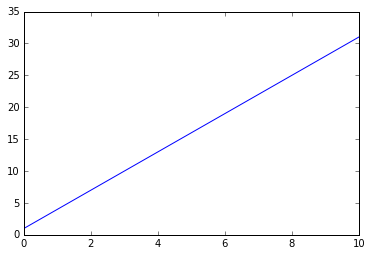

In [223]:
% matplotlib inline
import matplotlib.pyplot as plt
function=lambda x: 3*x+1
x=np.linspace(0, 10)
label="3x+1 = 2"
Simplex.showFunction(function, x, label)
plt.show()

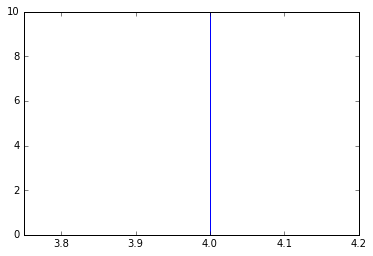

In [224]:
# Se le puede pasar un número si la función es de tipo y=n
x=np.linspace(0, 10)
label="3x+1 = 2"
Simplex.showFunction(4,x, label)
plt.show()

In [225]:
# Si se le pasa algo que no es una función o un número en el primer elemento, algo que no es un array de numpy en el segundo, o 
# algo que no es un string en el tercero, devuelve None
print(Simplex.showFunction(np.array([3,4,5]),x, label))

None


------

### * eliminateRepeatedPoints*

Este método recibe una lista de puntos(en forma de tupla) y devuelve la misma lista, con los puntos repetidos eliminados. Con enteros y rational, funciona exactamente, no así con float si los números tienen muchos decimales, puesto que podría considerar por ejemplo 5.33333 y 5.33334 como dos números distintos, cuando podrían ser el mismo. En caso de no recibir una lista, devuelve None. Ejemplos:

In [226]:
# Como vemos en este caso elimina un punto que está repetido
seq=[(rational(2,1),rational(3,4)),(rational(6,1),rational(7,4)),(rational(2,1),rational(3,4)),(rational(5,2),rational(3,4)),]
Simplex.eliminateRepeatedPoints(seq)

[(<PySimplex.rational.rational at 0x68fdf50>,
  <PySimplex.rational.rational at 0x68fd270>),
 (<PySimplex.rational.rational at 0x68fdfd0>,
  <PySimplex.rational.rational at 0x68fdf70>),
 (<PySimplex.rational.rational at 0x68fd7f0>,
  <PySimplex.rational.rational at 0x68fd550>)]

In [227]:
# Con enteros funciona perfectamente
seq=[(3,1),(4,5),(4,5),(2,1)]
Simplex.eliminateRepeatedPoints(seq)

[(3, 1), (4, 5), (2, 1)]

In [228]:
# Con float no funciona exactamente
seq=[(3.0,1.1),(4.0,5.0),(4.000001,5.0),(2.0,1.0)]
Simplex.eliminateRepeatedPoints(seq)

[(3.0, 1.1), (4.0, 5.0), (4.000001, 5.0), (2.0, 1.0)]

In [229]:
# Si no se introduce un lista, devuelve None
print(Simplex.eliminateRepeatedPoints(4))

None


------

### * eliminatePoints*

Este método recibe dos listas, y devuelve una lista con los elementos de la primera lista que no están en la segunda. Se puede utilizar para eliminar puntos(tuplas) o cualquier elemento. Igual que el método anterior, con float no funciona exactamente.Si no recibe dos listas, devuelve None. Ejemplos:

In [230]:
# Con enteros funciona perfectamente
list1=[(3,1),(4,5),(6,7)]
list2=[(2,5),(4,5),(4,8)]
Simplex.eliminatePoints(list1, list2)

[(3, 1), (6, 7)]

In [231]:
# Con rational funciona perfectamente
list1=[rational(5,1),rational(2,5),rational(6,1)]
list2=[rational(8,7),rational(2,5),rational(10,8)]
Simplex.eliminatePoints(list1, list2)

In [232]:
# Con float no funciona exactamente
list1=[(3.0,1.0),(4.0,5.0),(6.0,7.0)]
list2=[(2.0,5.0),(4.000001,5.0),(4.0,8.0)]
Simplex.eliminatePoints(list1, list2)

[(3.0, 1.0), (4.0, 5.0), (6.0, 7.0)]

In [233]:
# Si recibe algo que no sean dos listas, devuelve None
print(Simplex.eliminatePoints(3, list2))

None


------

### *calculatePointOfSolution*

Est método recibe un array de numpy con los coeficientes de la función a optimizar(en forma de maximización),una lista de puntos cuyas coordenadas son rational, y un rational con el valor de la función objetivo optimizada. El método devuelve cuál es el punto que alcanza el valor pasado. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [234]:
functionVector=np.array([rational(2,1),rational(3,1)])
points=[(rational(4,2),rational(3,4)),(rational(5,4),rational(6,8)),(rational(1,4),rational(6,1))]
solution = rational(19,4)
Simplex.calculatePointOfSolution(functionVector, points, solution)

[(<PySimplex.rational.rational at 0x68fd330>,
  <PySimplex.rational.rational at 0x68fd6b0>)]

In [235]:
functionVector=np.array([rational(2,1),rational(3,1)])
points=[(rational(4,2),rational(3,4)),(rational(5,4),rational(6,8)),(rational(1,4),rational(6,1))]
solution = rational(18,3)
print(Simplex.calculatePointOfSolution(functionVector, points, solution))

None


In [236]:
# Si recibe algo que no sea un array de numpy en el primer parámetro, una lista de puntos rational en el segundo, o un rational 
# en el tercero, devuelve None
print(Simplex.calculatePointOfSolution(functionVector, points, 3.0))

None


------

### *calculateSolution*

Este método recibe una función a optimizar en un string, en el formato que se puede ver en los ejemplos. Recibe un conjunto de puntos cuyas coordenas son rational. El método devuelve el valor de la función optimizada, y cuál es el punto de los pasados que la optimiza.Si la lista no tiene puntos, devuelve None. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [237]:
function="max 2 3"
points=[(rational(4,2),rational(3,4)),(rational(5,4),rational(6,8)),(rational(1,4),rational(6,1))]
sol=Simplex.calculateSolution(function, points)
print(sol[0])
print(sol[1])

37/2
[(<PySimplex.rational.rational object at 0x00C847B0>, <PySimplex.rational.rational object at 0x00C84E10>)]


In [238]:
function="min 2 3"
points=[(rational(4,2),rational(3,4)),(rational(5,4),rational(6,8)),(rational(1,4),rational(6,1))]
sol=Simplex.calculateSolution(function, points)
print(sol[0])
print(sol[1])

19/4
[(<PySimplex.rational.rational object at 0x00C4BE30>, <PySimplex.rational.rational object at 0x00C4BD70>)]


In [239]:
# Si la lista esta vacía, devuelve None
print(Simplex.calculateSolution(function,[]))

None


In [240]:
# Si recibe algo que no es un string en el primer parámetro o una lista de puntos rational en el segundo devuelve None
print(Simplex.calculateSolution(function, 4))

None


------

### *intersectionPoint*

Este método calcula el punto de intersección entre dos restricciones de tipo "=". Recibe dos array de numpy, cuyos componenetes deben ser rational, que contienen los coeficientes de las restricciones, y recibe también los recursos de cada restricción en dos rational. En caso de que no haya punto de intersección entre ellas, devuelve None. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [241]:
line1=np.array([rational(2,1),rational(3,4)])
line2=np.array([rational(8,3),rational(7,9)])
resource1=rational(3,1)
resource2=rational(4,1)
point=Simplex.intersectionPoint(line1, line2, resource1, resource2)
print("("+str(point[0])+","+str(point[1])+")")

(3/2,0)


In [242]:
# Si no hay punto de intersección, devuelve None
line1=np.array([rational(2,1),rational(3,4)])
line2=np.array([rational(2,1),rational(3,4)])
resource1=rational(3,1)
resource2=rational(4,1)
print(Simplex.intersectionPoint(line1, line2, resource1, resource2))

None


In [243]:
# Si se introduce algo que no es un array de rational de longitud 2 en los dos primeros parámetros, o algo que no es un rational,
#  en los dos últimos, devuelve None
print(Simplex.intersectionPoint(3, line2, resource1, resource2))

None


------

### *eliminateNegativePoints*

Este método recibe una lista de puntos cuyas coordenadas son rational, y devuelve la lista, sin aquellos puntos con coordenadas negativas. Si recibe algo que no es una lista de puntos rational, devuelve None. Ejemplos:

In [244]:
points=[(rational(4,2),rational(-3,4)),(rational(5,4),rational(6,-8)),(rational(1,4),rational(6,1))]
Simplex.eliminateNegativePoints(points)

[(<PySimplex.rational.rational at 0x68fddd0>,
  <PySimplex.rational.rational at 0x68fdf10>)]

In [245]:
# Si recibe algo que no es una lista de puntos rational, devuelve None
points=[(4,2),(6,-8),(6,1)]
print(Simplex.eliminateNegativePoints(points))

None


------

### *calculateAllIntersectionPoints*

Este método recibe un array de arrays de numpy con todas las restricciones, sin signo ni recursos, y un array de numpy con los recursos de cada restricción. El método devuelve en una lista, todos los puntos de intersección entre las restricciones y de las restricciones con los ejes de coordenadas positivos. También añade el punto (0,0). En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [246]:
matrix=np.array([[rational(3,4),rational(3,1)],[rational(4,5),rational(9,1)],[rational(6,1),rational(0,1)]])
resources=np.array([rational(3,1),rational(2,1),rational(4,1)])
Simplex.calculateAllIntersectionPoints(matrix, resources)

[(<PySimplex.rational.rational at 0xca2ff0>,
  <PySimplex.rational.rational at 0xca2df0>),
 (<PySimplex.rational.rational at 0xca2f70>,
  <PySimplex.rational.rational at 0xca2690>),
 (<PySimplex.rational.rational at 0xca2eb0>,
  <PySimplex.rational.rational at 0xca2050>),
 (<PySimplex.rational.rational at 0xca2a90>,
  <PySimplex.rational.rational at 0xca2f30>),
 (<PySimplex.rational.rational at 0xca2fb0>,
  <PySimplex.rational.rational at 0xca2f10>),
 (<PySimplex.rational.rational at 0xca2af0>,
  <PySimplex.rational.rational at 0xca2bf0>),
 (<PySimplex.rational.rational at 0xca2070>,
  <PySimplex.rational.rational at 0x402c590>),
 (<PySimplex.rational.rational at 0x402c230>,
  <PySimplex.rational.rational at 0x402c270>)]

In [247]:
# Si el número de restricciones es distinto del de recursos, devuelve None
matrix=np.array([[rational(3,4),rational(3,1)],[rational(4,5),rational(9,1)],[rational(6,1),rational(0,1)]])
resources=np.array([rational(3,1),rational(2,1)])
print(Simplex.calculateAllIntersectionPoints(matrix, resources))

None


In [248]:
# Si recibe algo que no sea un array de numpy, con elementos rational, devuelve None
print(Simplex.calculateAllIntersectionPoints(matrix, 4))

None


------

### *calculateNotBoundedIntersectionPoints*

Este método recibe un array de arrays de numpy con todas las restricciones, sin signo ni recursos,un array de numpy con los recursos de cada restricción y los máximos valores de x y de y que se van a representar, en dos ratioanl. El método devuelve en una lista, los puntos de intersección entre las restricciones y los ejes imaginarios constituidos en los máximos puntos representados. Por ejemplo si se pasa constX=3 y constY=4, devolverá los puntos de intersección entre las restricciones y los ejes y=3 y x=4 . También añade el punto de intersección entre los dos hipotéticos ejes(en el ejemplo anterior el punto (4,3). En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [249]:
matrix=np.array([[rational(3,4),rational(3,1)],[rational(4,5),rational(9,1)],[rational(6,1),rational(0,1)]])
resources=np.array([rational(3,1),rational(2,1),rational(4,1)])
constX= rational(10,1)
constY= rational(8,1)
Simplex.calculateNotBoundedIntersectionPoints(matrix, resources, constX, constY)

[(<PySimplex.rational.rational at 0xc4c230>,
  <PySimplex.rational.rational at 0xc4cc10>),
 (<PySimplex.rational.rational at 0xc4cd30>,
  <PySimplex.rational.rational at 0xc4cc70>)]

In [250]:
matrix=np.array([[rational(3,4),rational(3,1)],[rational(4,5),rational(9,1)]])
resources=np.array([rational(3,1),rational(2,1),rational(4,1)])
constX= rational(10,1)
constY= rational(8,1)
print(Simplex.calculateNotBoundedIntersectionPoints(matrix, resources, constX, constY))

None


In [251]:
# Si recibe algo que no sea un array de numpy, con elementos rational, en los dos primeros parámetros o algo que no sea un
# rational en los dos últimos, devuelve None
print(Simplex.calculateNotBoundedIntersectionPoints(matrix, resources, np.array([rational(4,5)]), constY))

None


------

### *checkIfIsSolution*

Este método recibe una restricción, con los coeficentes de la misma en una array de numpy, la solución a probar en una tupla, el signo en un string y el recurso en un número. El método devuelve True, si la solución satisface la restricción, o False si no la satisface. El método funciona con enteros y rational, perfectamente, pero con float, no es del todo exacto. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [252]:
# Si cumple la inecuación
inecuation=np.array([3,4])
solution=(1,1)
sign=">="
resource=6
Simplex.checkIfIsSolution(inecuation, solution, sign, resource)

True

In [253]:
# Con rational también funciona
inecuation=np.array([rational(3,2),rational(4,3)])
solution=(rational(2,1),rational(1,1))
sign="<="
resource=rational(5,1)
Simplex.checkIfIsSolution(inecuation, solution, sign, resource)

True

In [254]:
# Si la inecuación no se cumple
inecuation=np.array([3,4])
solution=(1,1)
sign="="
resource=6
Simplex.checkIfIsSolution(inecuation, solution, sign, resource)

False

In [255]:
# No funciona exactamente con float
inecuation=np.array([3.0,4.0])
solution=(1.0,1.0)
sign="="
resource=7.00001
Simplex.checkIfIsSolution(inecuation, solution, sign, resource)

False

In [256]:
# Si se introduce algo que no se un array de numpy de longitud 2 en el primer parámetro, una tupla en el segundo, un string en el 
# tercero o un número en el último, devuelve None
print(Simplex.checkIfIsSolution(inecuation, solution, sign,np.array([3,4])))

None


------

### *calculateFeasibleRegion*

Este método recibe un conjunto de puntos en una lista, un conjunto de restricciones en un array de numpy, sin signos ni recursos,un array de numpy con los recursos y una lista de string con los signos. El método devuelve la lista de puntos introducidos, que cumplen todas las restricciones, es decir pertenecen a la región factible. El método funciona tanto con rational, como con enteros, no siendo tan exacto con float. Si ningún punto pertenece a la región factible, devolverá una lista vacía. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:


In [257]:
# El método funciona con valores rational, eliminando los puntos que no pertencen a la región factible
points=[(rational(0,1),rational(5,1)),(rational(5,1),rational(0,1)),(rational(10,1),rational(12,1)),
        (rational(-30,1),rational(1,2))]
inecuations=np.array([np.array([rational(-7,1),rational(10,1)]),np.array([rational(2,1),rational(1,1)]),
                      np.array([rational(8,1),rational(-7,1)])])

resources=np.array([rational(50,1),rational(32,1),rational(40,1)])
sign=["<=","<=","<="]
Simplex.calculateFeasibleRegion(points, inecuations, resources, sign)

[(<PySimplex.rational.rational at 0xc9ce70>,
  <PySimplex.rational.rational at 0xc9c3b0>),
 (<PySimplex.rational.rational at 0xc9c7b0>,
  <PySimplex.rational.rational at 0xc9c410>),
 (<PySimplex.rational.rational at 0xc9cef0>,
  <PySimplex.rational.rational at 0xc9cf70>)]

In [258]:
# El método funciona con valores enteros, eliminando los puntos que no pertencen a la región factible
points=[(0,5),(5,0),(10,12),(-30,1)]       
inecuations=np.array([np.array([-7,10]),np.array([2,1]), np.array([8,-7])])
resources=np.array([50,32,40])
sign=["<=","<=","<="]
Simplex.calculateFeasibleRegion(points, inecuations, resources, sign)

[(0, 5), (5, 0), (10, 12)]

In [259]:
# El número de restricciones tiene que ser igual que el de signos y el de recursos
points=[(0,5),(5,0),(10,12),(-30,1)]       
inecuations=np.array([np.array([-7,10]),np.array([2,1]), np.array([8,-7])])
resources=np.array([50,32])
sign=["<=","<=","<="]
print(Simplex.calculateFeasibleRegion(points, inecuations, resources, sign))

None


In [260]:
# Si se introduce algo que no es una lista, en el primer parámetro, un array de numpy en el segundo y tercer parámetro, o una 
# lista de strings, en el cuarto parámetro, devuelve None
inecuations=np.matrix([np.array([2,1]),np.array([1,-1]),np.array([5,2])])
print(Simplex.calculateFeasibleRegion(points, inecuations, resources, sign))

None


------

### *calculateMaxScale*

Este método recibe una lista de puntos, y devuelve el máximo valor de la coordenada x y de la coordenada y. Se utiliza para saber cuál es el punto máximo que se debe representar. En caso de no recibir una lista, devuelve None. Ejemplos:

In [261]:
points=[(4,3),(5,6),(1,-2)]
Simplex.calculateMaxScale(points)

(5, 6)

In [262]:
points=[(rational(0,1),rational(5,1)),(rational(5,1),rational(0,1)),(rational(10,1),rational(12,1)),
        (rational(-30,1),rational(1,2))]
Simplex.calculateMaxScale(points)

(<PySimplex.rational.rational at 0xc8a490>,
 <PySimplex.rational.rational at 0xc8afb0>)

In [263]:
points=[(4.6,3.7),(5.0,6.5),(1.2,-2.5)]
Simplex.calculateMaxScale(points)

(5.0, 6.5)

In [264]:
# Si recibe algo que no es una lista, devuelve None
print(Simplex.calculateMaxScale(3))

None


------

### *calculateMinScale*

Este método recibe una lista de puntos, y devuelve el mínimo valor de la coordenada x y de la coordenada y. Se utiliza para saber cuál es el punto mínimo que se debe representar. En caso de no recibir una lista, devuelve None. Ejemplos:

In [265]:
points=[(4,3),(5,6),(1,-2)]
Simplex.calculateMinScale(points)

(1, -2)

In [266]:
points=[(rational(0,1),rational(5,1)),(rational(5,1),rational(0,1)),(rational(10,1),rational(12,1)),
        (rational(-30,1),rational(1,2))]
Simplex.calculateMinScale(points)

(<PySimplex.rational.rational at 0xc8aab0>,
 <PySimplex.rational.rational at 0xc8a3b0>)

In [267]:
points=[(4.6,3.7),(5.0,6.5),(1.2,-2.5)]
Simplex.calculateMinScale(points)

(1.2, -2.5)

In [268]:
# Si recibe algo que no es una lista, devuelve None
print(Simplex.calculateMinScale(3))

None


------

### *checkIfPointInFeasibleRegion*

Este método recibe un punto en una tupla, un conjunto de restricciones en un array de numpy, sin signos ni recursos,un array de numpy con los recursos y una lista de string con los signos. El método devuelve True, si el punto cumple todas las restricciones, es decir pertenece a la región factible, y False, si no pertenece. El método funciona tanto con rational, como con enteros, no siendo tan exacto con float. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [269]:
point=(rational(0,1),rational(5,1))
inecuations=np.array([np.array([rational(-7,1),rational(10,1)]),np.array([rational(2,1),rational(1,1)]),
                      np.array([rational(8,1),rational(-7,1)])])

resources=np.array([rational(50,1),rational(32,1),rational(40,1)])
sign=["<=","<=","<="]
Simplex.checkIfPointInFeasibleRegion(point, inecuations, resources, sign)

True

In [270]:
point=(rational(-30,1),rational(1,2))
inecuations=np.array([np.array([rational(-7,1),rational(10,1)]),np.array([rational(2,1),rational(1,1)]),
                      np.array([rational(8,1),rational(-7,1)])])

resources=np.array([rational(50,1),rational(32,1),rational(40,1)])
sign=["<=","<=","<="]
Simplex.checkIfPointInFeasibleRegion(point, inecuations, resources, sign)

False

In [271]:
# El método funciona con valores enteros, eliminando los puntos que no pertencen a la región factible
points=(0,5)
inecuations=np.array([np.array([-7,10]),np.array([2,1]), np.array([8,-7])])
resources=np.array([50,32,40])
sign=["<=","<=","<="]
Simplex.checkIfPointInFeasibleRegion(point, inecuations, resources, sign)

False

In [272]:
# El número de restricciones tiene que ser igual que el de signos y el de recursos
points=(0,5)
inecuations=np.array([np.array([-7,10]),np.array([2,1])])
resources=np.array([50,32,40])
sign=["<=","<=","<="]
print(Simplex.checkIfPointInFeasibleRegion(point, inecuations, resources, sign))

None


In [273]:
# Si se introduce algo que no es una tupla, en el primer parámetro, un array de numpy en el segundo y tercer parámetro, o una 
# lista de strings, en el cuarto parámetro, devuelve None
print(Simplex.checkIfPointInFeasibleRegion(4, inecuations, resources, sign))

None


------

### *calculateIntegerPoints*

Este método recibe un conjunto de restricciones en un array de numpy, sin signos ni recursos,un array de numpy con los recursos, una lista de string con los signos y dos tuplas, con el mínimo y el máximo punto a representar. El método devuelve una lista con todos los puntos enteros que pertenecen a esa región factible y que son menores que el punto máximo. Todos los elementos de las restricciones, recursos y de la tupla, deben ser rational. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [274]:
# Puntos calculados con rational
inecuations=np.array([np.array([rational(-7,1),rational(10,1)]),np.array([rational(2,1),rational(1,1)]),
                      np.array([rational(8,1),rational(-7,1)])])

resources=np.array([rational(50,1),rational(32,1),rational(40,1)])
sign=["<=","<=","<="]
scale1=(rational(0,1),rational(0,1))
scale=(rational(10,1),rational(10,1))
Simplex.calculateIntegerPoints(inecuations, resources, sign, scale1,scale)

[(<PySimplex.rational.rational at 0xce7830>,
  <PySimplex.rational.rational at 0xce7850>),
 (<PySimplex.rational.rational at 0xce7870>,
  <PySimplex.rational.rational at 0xce7890>),
 (<PySimplex.rational.rational at 0xce78b0>,
  <PySimplex.rational.rational at 0xce7910>),
 (<PySimplex.rational.rational at 0xce7950>,
  <PySimplex.rational.rational at 0xce78d0>),
 (<PySimplex.rational.rational at 0xce7930>,
  <PySimplex.rational.rational at 0xce78f0>),
 (<PySimplex.rational.rational at 0xce7970>,
  <PySimplex.rational.rational at 0xce7990>),
 (<PySimplex.rational.rational at 0xce79b0>,
  <PySimplex.rational.rational at 0xce79d0>),
 (<PySimplex.rational.rational at 0xce79f0>,
  <PySimplex.rational.rational at 0xce7a10>),
 (<PySimplex.rational.rational at 0xce7ad0>,
  <PySimplex.rational.rational at 0xce7ab0>),
 (<PySimplex.rational.rational at 0xce7a70>,
  <PySimplex.rational.rational at 0xce7a50>),
 (<PySimplex.rational.rational at 0xce7a30>,
  <PySimplex.rational.rational at 0xce7a90>),

In [275]:
# El número de restricciones tiene que ser igual que el de signos y el de recursos
inecuations=np.array([np.array([rational(-7,1),rational(10,1)]),np.array([rational(2,1),rational(1,1)]),
                      np.array([rational(8,1),rational(-7,1)])])

resources=np.array([rational(50,1),rational(32,1),rational(40,1)])
sign=["<=","<="]
scale=(rational(10,1),rational(10,1))
print(Simplex.calculateIntegerPoints(inecuations, resources, sign, scale1, scale))

None


In [276]:
# Si se introduce algo que no es un array de numpy de rational en el primer y segundo parámetro,una lista de strings, en el
# tercer parámetro,o una tupla en el último parámetro devuelve None
print(Simplex.calculateIntegerPoints(inecuations, resources, sign, scale1, 4))

None


------

### *centre*

Este método recibe una lista de puntos, y devuelve el punto que está en el centro del polígono que forman dichos puntos. Las coordenadas de los puntos deben ser rational. En caso de no pasar una lista de puntos rational, devuelve None. Ejemplos:

In [277]:
points=[(rational(4,5),rational(1,2)),(rational(4,2),rational(3,1)),(rational(8,3),rational(3,5)),(rational(7,2),rational(4,5)),
        (rational(7,9),rational(4,9)),(rational(9,8),rational(10,7))]
point=Simplex.centre(points)
print("("+str(point[0])+","+str(point[1])+")")

(3913/2160,4267/3780)


In [278]:
# Si recibe algo que no es una lista de puntos rational, devuelve None
points=[(4.0,5.0),(4.0,3.0),(8.0,5.0),(7.0,4.0),(7.0,9.0),(10.0,4.0)]
print(Simplex.centre(points))

None


------

### *isThePoint*

Este método recibe una lista de puntos, cuyas coordenadas son rational, un valor, que es el cálculo de la distancia al centro, y el centro de los puntos de la lista. El método devuelve el punto de la lista cuya distancia al centro, es el valor introducido. Si ningún punto, cumple la distancia devuelve None. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [279]:
listPoints=[(rational(4,5),rational(1,2)),(rational(4,2),rational(3,1)),(rational(8,3),rational(3,5)),(rational(7,2)
        ,rational(4,5)),(rational(7,9),rational(4,9)),(rational(9,8),rational(10,7))]
M = (1.811574074074074,1.1288359788359787)
value =  2.7299657524245156
point=Simplex.isThePoint(listPoints, value, M)
print("("+str(point[0])+","+str(point[1])+")")

(9/8,10/7)


In [280]:
# En caso de no recibir una lista de puntos rational, en el primer parámetro, un número en el segundo o una tupla en el tercero, 
# devuelve None(ver si coge float en el centro)
print(Simplex.isThePoint(listPoints, value, 4))

None


------

### *calculateOrder*

Este método recibe una lista de puntos, cuyas coordenadas son rational, y devuelve la misma lista de puntos, pero ordenadas en sentido horario. En caso de no introducir una lista de rational, devuelve None. Ejemplos:

In [281]:
listPoints=[(rational(4,5),rational(1,2)),(rational(4,2),rational(3,1)),(rational(8,3),rational(3,5)),(rational(7,2),
         rational(4,5)), (rational(7,9),rational(4,9)),(rational(9,8),rational(10,7))]
Simplex.calculateOrder(listPoints)

[(<PySimplex.rational.rational at 0xc9ccd0>,
  <PySimplex.rational.rational at 0xc9c8b0>),
 (<PySimplex.rational.rational at 0xc9c350>,
  <PySimplex.rational.rational at 0xc9cfd0>),
 (<PySimplex.rational.rational at 0xc9c1f0>,
  <PySimplex.rational.rational at 0xc9cbd0>),
 (<PySimplex.rational.rational at 0xc9cbb0>,
  <PySimplex.rational.rational at 0xc9c1d0>),
 (<PySimplex.rational.rational at 0xc9c090>,
  <PySimplex.rational.rational at 0xc9c630>),
 (<PySimplex.rational.rational at 0xc9c210>,
  <PySimplex.rational.rational at 0xc9c0f0>)]

In [282]:
# Si recibe algo que no es una lista de puntos con coordenadas rational
listPoints=[(4.0,5.0),(4.0,3.0),(8.0,5.0),(7.0,4.0),(7.0,9.0),(10.0,4.0)]
print(Simplex.calculateOrder(listPoints))

None


------

### *pointIsInALine*

Este método recibe un punto en una tupla, una restricción sin signos ni recursos en un array de numpy, y el recurso, como un número. El método devuelve True, si el punto, esta sobre la línea que representa la restricción en el plano, en otro caso devuelve False. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [283]:
# Si el punto está en la línea, devuelve True
point = (3,4)
line = np.array([3,2])
resource = 17
Simplex.pointIsInALine(point, line, resource)

True

In [284]:
# El método funciona con rational
point = (rational(3,1),rational(4,2))
line = np.array([rational(3,3),rational(2,1)])
resource = rational(7,1)
Simplex.pointIsInALine(point, line, resource)

True

In [285]:
# Si el punto no está en la línea, devuelve False
point = (3,4)
line = np.array([3,2])
resource = 10
Simplex.pointIsInALine(point, line, resource)

False

In [286]:
# El método no funciona exactamente con float
point = (3.0,4.0)
line = np.array([3.0,2.0])
resource = 17.00001
Simplex.pointIsInALine(point, line, resource)

False

In [287]:
# En caso de no recibir una tupla,en el primer parámetro, un array de numpy en el segundo o un número en el tercero, devuelve 
# None
print(Simplex.pointIsInALine(point, 3, resource))

None


------

### *deleteLinePointsOfList*

Este método recibe un conjunto de puntos en una lista, un array de numpy con un conjunto de restricciones sin signos, ni recursos, y un array de numpy con los recursos de las restricciones. El método devuelve la lista de puntos, pero sin aquellos puntos que están en la línea que representa alguna de las restricciones introducidas. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

In [288]:
# Elimina el último punto que está en una línea
listPoints=[(rational(3,1),rational(5,7)),(rational(5,8),rational(6,2)),(rational(4,6),rational(8,9)),(rational(8,1),
                                                                                                       rational(2,1))]
matrix=np.array([[rational(2,1),rational(1,1)],[rational(1,1),rational(-1,1)],[rational(5,1),rational(2,1)]])
resources=np.array([rational(18,1),rational(8,1),rational(0,1)])
Simplex.deleteLinePointsOfList(listPoints, matrix, resources)

[(<PySimplex.rational.rational at 0xcfedf0>,
  <PySimplex.rational.rational at 0xd05030>),
 (<PySimplex.rational.rational at 0xd05050>,
  <PySimplex.rational.rational at 0xd05070>),
 (<PySimplex.rational.rational at 0xd05090>,
  <PySimplex.rational.rational at 0xd050b0>)]

In [289]:
# Si recibe algo que no es una lista de puntos con coordenadas rational,o algo que no es un array de numpy con elementos rational
# en el segundo y tercer parámetro,devuelve None
print(Simplex.deleteLinePointsOfList(listPoints, 4, resources))

None


------

### *showProblemSolution*

Este método resuelve el problema de programación lineal que se le pasa por parámetro, de manera gráfica. Para ello, recibe una matriz de numpy que contiene las restricciones, sin signos ni recursos, un array de numpy que contiene los recursos, una lista de strings, que contienen los signos de las restricciones, un string que contiene la función en el formato "max/min 2 -3" y un valor False o un nombre, que determina si se quiere guardar la imagen en el archivo con el nombre indicado. El método muestra la solución gráfica, siempre que el problema tenga solo 2 variables, en otro caso devuelve None. No es necesario que se introduzca el problema en forma estándar. En caso de que los parámetros introducidos no sean correctos(ver ejemplos), devolverá None. Ejemplos:

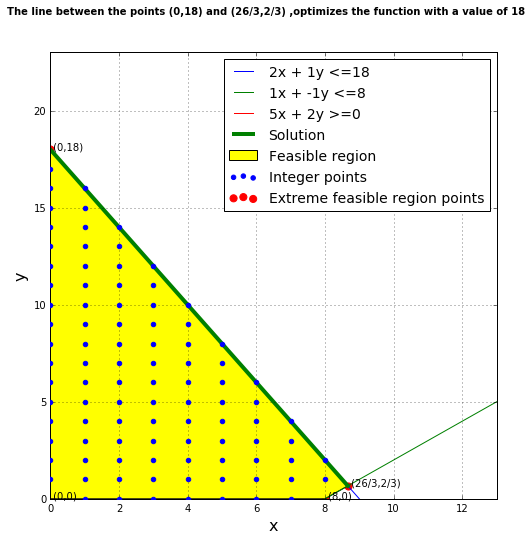

In [290]:
%matplotlib inline
matrix=np.matrix([[rational(2,1),rational(1,1)],[rational(1,1),rational(-1,1)],[rational(5,1),rational(2,1)]])
resources=np.array([rational(18,1),rational(8,1),rational(0,1)])
signs=["<=","<=",">="]
function="max 2 1"
save= False
Simplex.showProblemSolution(matrix, resources, signs, function, save)

In [291]:
# Si el número de signos es diferente a la longitud del vector de recursos o diferente del número de filas de la matriz, 
# devuelve None
matrix=np.matrix([[2,1],[1,-1],[5,2]])
resources=np.array([[18],[8]])
signs=["<=","<=",">="]
function="max 2 1"
save=False
print(Simplex.showProblemSolution(matrix, resources, signs, function, save))

None


In [292]:
# Si se pasa por parámetro algo que no es una matriz de numpy en el primer parámetro con elementos rational, algo que no es un 
# array de numpy con elementos rationalen el segundo,algo que no es una lista de strings en el tercero,algo que no es un string
# en el cuarto o algo que no sea False o un string en el quinto,devuelve None

matrix=np.matrix([[2,1],[1,-1],[5,2]])
resources=np.array([[18],[8],[4]])
signs=["<=","<=",">="]
function="max 2 1"
print(Simplex.showProblemSolution(matrix, resources, signs, function, False))

None


------